# TODO: CHECK IF UNDEFINED EXCLUDED FROM EXTERNAL DATA
* because performance on same data is still not perfect (and should be!)

# TODO: combine and re-split Training/External Datasets
* to see if is randomly due to data splitting

# TODO: re-split Training/External Datasets PER GENE/SCREEN


# TODO: check that model trained on data fits well on that SAME data


### Apply Model to External Dataset 


In [1]:

# import glob
# trouble_shooting_datasets = glob.glob('new_input_data/for_troubleshooting_and_testing/*')
# trouble_shooting_datasets = [x for x in trouble_shooting_datasets if '_external_sirna' in x]

# for f in trouble_shooting_datasets:
#     #print(f.split('new_input_data/for_troubleshooting_and_testing/')[-1].split('_newly')[0])
#     print('*'+f.split('new_input_data/for_troubleshooting_and_testing/')[-1].split('_external_sirna')[0])

# file_lab__ = 'original'
# # file_lab__ = 'shuffled-sequences'
# # file_lab__ = 'randomized-expression'
# # file_lab__ = 'shuffled-expression'

# ext_data_file = [x for x in trouble_shooting_datasets if file_lab__ in x][0].split('new_input_data/')[-1]
# print('\n '+ext_data_file)



starting_input_data_file = 'new_input_data/compiled_all_sirna_screen_data_6247-sirnas|5449-bdna|798-dualglo_MAR-11-2024.csv'
train_data_file = 'new_input_data/training_sirna_screen_data_bdna-human-p3_1903-sirnas_MAR-21-2024.csv'
ext_data_file = 'new_input_data/external_sirna_screen_data_bdna-human-p3_670-sirnas_MAR-21-2024.csv'

# NOTE: would be renamed if run code in below box
subset_training_data_file = 'new_input_data/for_troubleshooting_and_testing/SUBSET-training_sirna_screen_data_bdna-human-p3_670-sirnas_APR-02-2024.csv'







# Make Dataset of equal size to external dataset

total: 670 
	efficient: 200 
	inefficient: 243 
	undefined: 227


Training Data
total: 1903 
	efficient: 613 
	inefficient: 655 
	undefined: 635
200 200
243 243
227 227
670 670

Dataset exported to:
	 new_input_data/for_troubleshooting_and_testing/SUBSET-training_sirna_screen_data_bdna-human-p3_670-sirnas_APR-02-2024.csv


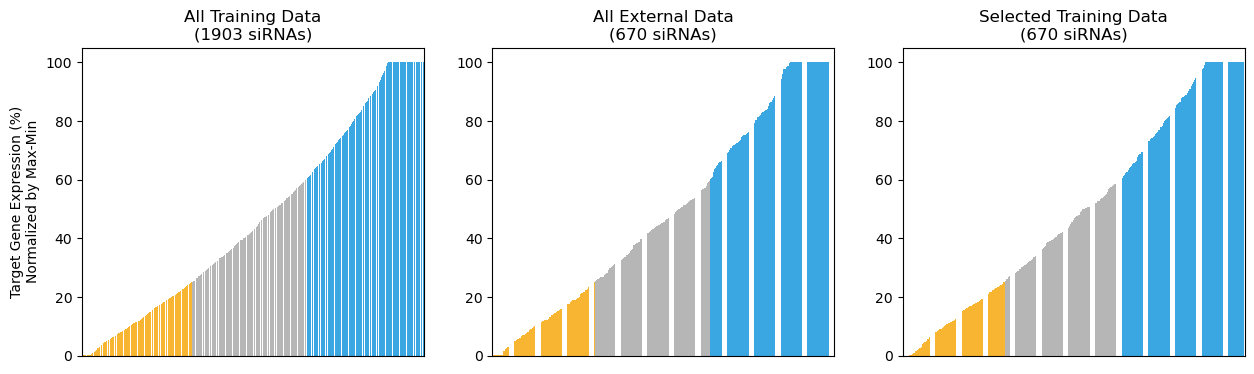

In [2]:
import pandas as pd
import numpy as np

# train_data_file = 'new_input_data/training_sirna_screen_data_bdna-human-p3_1903-sirnas_MAR-21-2024.csv'
# ext_data_file = 'new_input_data/external_sirna_screen_data_bdna-human-p3_670-sirnas_MAR-21-2024.csv'



df_ext = pd.read_csv(ext_data_file)
df = pd.read_csv(train_data_file)

effco_=25
ineffco_=60

num_eff_ = len(df_ext[df_ext['expression_percent_normalized_by_max_min'] <= effco_])
num_ineff_ = len(df_ext[df_ext['expression_percent_normalized_by_max_min'] >= ineffco_])
num_undef_ = len(df_ext)-(num_eff_+num_ineff_)

print('total:',len(df_ext),'\n\tefficient:',num_eff_,'\n\tinefficient:',num_ineff_,'\n\tundefined:',num_undef_)


# Select Efficient data randomly
import random
eff_indxs_ = list(df[df['expression_percent_normalized_by_max_min'] <= effco_].index)
ineff_indxs_ = list(df[df['expression_percent_normalized_by_max_min'] >= ineffco_].index)
undef_indexs_ = list(df[ (df['expression_percent_normalized_by_max_min'] > effco_) & 
                        (df['expression_percent_normalized_by_max_min'] < ineffco_)].index)
  

print('\n\nTraining Data\ntotal:',len(df),'\n\tefficient:',len(eff_indxs_),'\n\tinefficient:',len(ineff_indxs_),'\n\tundefined:',len(undef_indexs_))

# help(random) #eff_indxs_

selected_eff_indxs_ = random.sample(eff_indxs_, num_eff_)
selected_ineff_indxs_ = random.sample(ineff_indxs_, num_ineff_)
selected_undef_indxs_ = random.sample(undef_indexs_, num_undef_)

print(len(set(selected_eff_indxs_)),len(selected_eff_indxs_))
print(len(set(selected_ineff_indxs_)),len(selected_ineff_indxs_))
print(len(set(selected_undef_indxs_)),len(selected_undef_indxs_))

selected_indxs_ = selected_ineff_indxs_+selected_eff_indxs_+selected_undef_indxs_


print(len(set(selected_indxs_)),
      len(selected_indxs_))
df_selected_ = df.iloc[selected_indxs_].copy()
df_selected_.sort_index(inplace=True)

# df_selected_


# PLOT DATA:

all_eff_indxs_ = list(df[df['expression_percent_normalized_by_max_min'] <= effco_].index)
all_ineff_indxs_ = list(df[df['expression_percent_normalized_by_max_min'] >= ineffco_].index)
all_undef_indxs_ = list(df[ (df['expression_percent_normalized_by_max_min'] > effco_) & 
                        (df['expression_percent_normalized_by_max_min'] < ineffco_)].index)

df['class'] = np.nan
for i in all_eff_indxs_:
    df.at[i,'class'] = 'efficient'
for i in all_ineff_indxs_:
    df.at[i,'class'] = 'inefficient'
for i in all_undef_indxs_:
    df.at[i,'class'] = 'undefined'
    

from matplotlib import pyplot as plt
fig, axs = plt.subplots(1,3)
fig.set_size_inches(w=15, h=4)

colors_ls_all = [x.replace('inefficient', '#3AA6E2').replace('efficient', '#F7B531').replace('undefined', '#B6B6B7') for
             x in list(df.sort_values(by='expression_percent_normalized_by_max_min')['class'])]
axs[0].bar(
    x=list(range(len(df))),
    height=df.sort_values(by='expression_percent_normalized_by_max_min')['expression_percent_normalized_by_max_min'],
    color = colors_ls_all,
)
axs[0].set_title('All Training Data\n('+str(len(df))+' siRNAs)')
axs[0].set_xlim(-1,len(df))


ext_eff_indxs_ = list(df_ext[df_ext['expression_percent_normalized_by_max_min'] <= effco_].index)
ext_ineff_indxs_ = list(df_ext[df_ext['expression_percent_normalized_by_max_min'] >= ineffco_].index)
ext_undef_indxs_ = list(df_ext[ (df_ext['expression_percent_normalized_by_max_min'] > effco_) & 
                        (df_ext['expression_percent_normalized_by_max_min'] < ineffco_)].index)

df_ext['class'] = np.nan
for i in ext_eff_indxs_:
    df_ext.at[i,'class'] = 'efficient'
for i in ext_ineff_indxs_:
    df_ext.at[i,'class'] = 'inefficient'
for i in ext_undef_indxs_:
    df_ext.at[i,'class'] = 'undefined'
    


colors_ls_ext = [x.replace('inefficient', '#3AA6E2').replace('efficient', '#F7B531').replace('undefined', '#B6B6B7') for
             x in list(df_ext.sort_values(by='expression_percent_normalized_by_max_min')['class'])]
axs[1].bar(
    x=list(range(len(df_ext))),
    height=df_ext.sort_values(by='expression_percent_normalized_by_max_min')['expression_percent_normalized_by_max_min'],
    color = colors_ls_ext,
)
axs[1].set_title('All External Data\n('+str(len(df_ext))+' siRNAs)')
axs[1].set_xlim(-1,len(df_ext))


df_selected_['class'] = np.nan
for i in selected_eff_indxs_:
    df_selected_.at[i,'class'] = 'efficient'
for i in selected_ineff_indxs_:
    df_selected_.at[i,'class'] = 'inefficient'
for i in selected_undef_indxs_:
    df_selected_.at[i,'class'] = 'undefined'


colors_ls_sel = [x.replace('inefficient', '#3AA6E2').replace('efficient', '#F7B531').replace('undefined', '#B6B6B7') for
             x in list(df_selected_.sort_values(by='expression_percent_normalized_by_max_min')['class'])]
axs[2].bar(
    x=list(range(len(df_selected_))),
    height=df_selected_.sort_values(by='expression_percent_normalized_by_max_min')['expression_percent_normalized_by_max_min'],
    color = colors_ls_sel,
)
axs[2].set_title('Selected Training Data\n('+str(len(df_selected_))+' siRNAs)')
axs[2].set_xlim(-1,len(df_selected_))

axs[0].set_ylabel('Target Gene Expression (%)\nNormalized by Max-Min')

for i in range(len(axs)): 
    axs[i].set_xticks([])

## ** SAVE FIGURE **
# plt.rcParams['svg.fonttype'] = 'none'  # exports text as strings rather than vector paths (images)
# fig_fnm_ = 
# fig.savefig(fig_fnm_+'.svg', format='svg', transparent=True)
# fig.savefig(fig_fnm_ + '.png', format='png', dpi=300, transparent=False)
# print('Figure saved to:\n\t', fig_fnm_ + '.png')

    
# Export randomly selected (but equally distributed Training Datast)
from datetime import datetime
import calendar
month_ = calendar.month_abbr[datetime.now().month].upper() 
day_ = str(datetime.now().day)
if len(day_) <2:
    day_ = '0'+day_
year_ = str(datetime.now().year)
date_ = month_+'-'+day_+'-'+year_

subset_training_data_file = 'new_input_data/'+'for_troubleshooting_and_testing/SUBSET-training_sirna_screen_data_bdna-human-p3_'+str(len(df_selected_))+'-sirnas_'+date_+'.csv'

                                                                                                   

df_selected_.to_csv(subset_training_data_file)
print('\nDataset exported to:\n\t',subset_training_data_file)




# Build Initial Model with Entire Training Dataset
***(and apply to External Dataset)***




IMPORTANT: run_param_optimization__ is set to (False) so will not be running parameter optimization(will only be building final models). Any mention of parameter optimization from Constructor can be ignored.






NOTE: running without optimizing any parameters






NOTE: parameter_to_optimize = (None) if this parameter was set in the input, it will be ignored!	 Instead will consider these parameter values: [ ]



Date set successfully! APR-2-2024

Creating processed datasets...

	 all_data_label_str_ = human_p3_bDNA_normalized_effco-25|ineffco-60-removed_undefined_siRNAs
	 abbrev_all_data_label_str_ = h_p3_bDNA_oh-bowgenw-w2vcbow-w2vsg-annftxsg-annftxcbow-annftlab_norm_25-60-rm-u
Creating processed datasets...
Successfully read in .csv data



Successfully read in - 1903 siRNAs
P3    1903
Name: chemical_scaffold, dtype: int64

bDNA    1903
Name: screen_type, dtype: int64

human    1903
Name: species, dtype: int64
Selecting data with screen type:
 ['bDNA']
Selecting data with speci

Read 0M words
Number of words:  42257
Number of labels: 0
Progress: 100.0% words/sec/thread:   18996 lr:  0.000000 avg.loss:  0.825741 ETA:   0h 0m 0s 18.0% words/sec/thread:   19737 lr:  0.040988 avg.loss:  2.466213 ETA:   0h 0m 5s


encoding: ann-fasttext-cbow


Read 0M words
Number of words:  42257
Number of labels: 0
Progress: 100.0% words/sec/thread:   99757 lr:  0.000000 avg.loss:  2.625996 ETA:   0h 0m 0s


encoding: ann-fasttext-class-trained


Read 0M words
Number of words:  32194
Number of labels: 3
Progress: 100.0% words/sec/thread:  327489 lr:  0.000000 avg.loss:  1.102537 ETA:   0h 0m 0s




Encoded vector lengths:


one-hot	 bow-countvect	 bow-gensim	 bow-gensim-weights	 ann-keras	 ann-word2vec-gensim	 ann-word2vec-gensim-cbow	 ann-word2vec-gensim-skipgram	 ann-fasttext-cbow	 ann-fasttext-skipgram	 ann-fasttext-class-trained
240 	 54 		 120 		 120 		 120 		 120 		 120 		
240 	 54 		 120 		 120 		 120 		 120 		 120 		

Splitting Datasets into train/test/paramopt...
self.datasplit_id_ | Randomized 8-digit ID for this Set of Rounds:	 rfN11610
All datasets will be stored in:
 /Users/kmonopoli/Dropbox (UMass Medical School)/data_representation-sequences/cleaned_parameter_optimization/data_representation_parameter_optimizationoutput_model_fitting/
	data-rfN11610_h_p3_bDNA_oh-bowgenw-w2vcbow-w2vsg-annftxsg-annftxcbow-annftlab_norm_25-60-rm-u/
Data processing parameter data appeneded to: 
	 output_model_fitting/data-processing-param-index.csv
Figure saved to: output_model_fitting/data-rfN11610_h_p3_bDNA_oh-bowgenw-w2vcbow-w2vsg-annftxsg-annftxcbow-annftlab_norm_25-60-rm-u/figur


Computing Final fbeta_score with beta = 0.5

Evaluating performance on external dataset for model 2 / 3...


Computing Final fbeta_score with beta = 0.5



Final model 2 with encoding one-hot saved to: ~/

models/final_rf_model_rnd-2_oh.pickle

Computing Final fbeta_score with beta = 0.5

Evaluating performance on external dataset for model 2 / 3...


Computing Final fbeta_score with beta = 0.5



Final model 2 with encoding bow-gensim-weights saved to: ~/

models/final_rf_model_rnd-2_bowgenw.pickle

Computing Final fbeta_score with beta = 0.5

Evaluating performance on external dataset for model 2 / 3...


Computing Final fbeta_score with beta = 0.5



Final model 2 with encoding ann-word2vec-gensim-cbow saved to: ~/

models/final_rf_model_rnd-2_w2vcbow.pickle

Computing Final fbeta_score with beta = 0.5

Evaluating performance on external dataset for model 2 / 3...


Computing Final fbeta_score with beta = 0.5



Final model 2 with encoding ann-word2vec-gensim-skipgram saved to: ~/


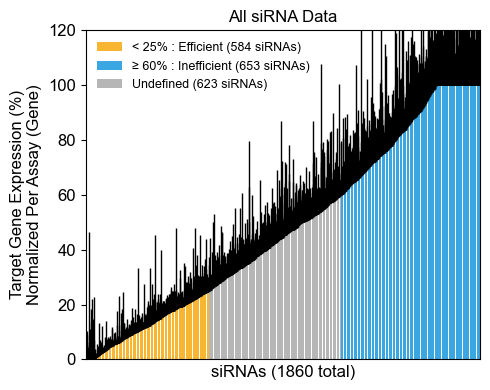

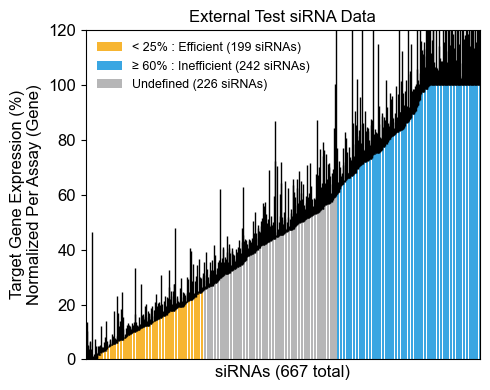

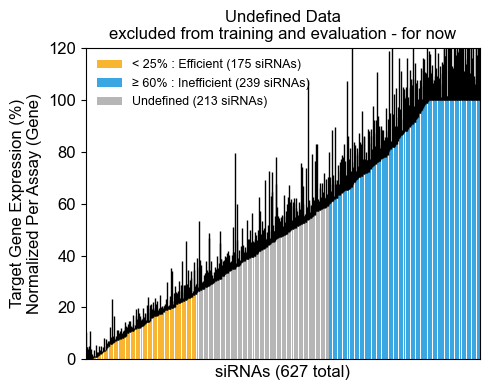

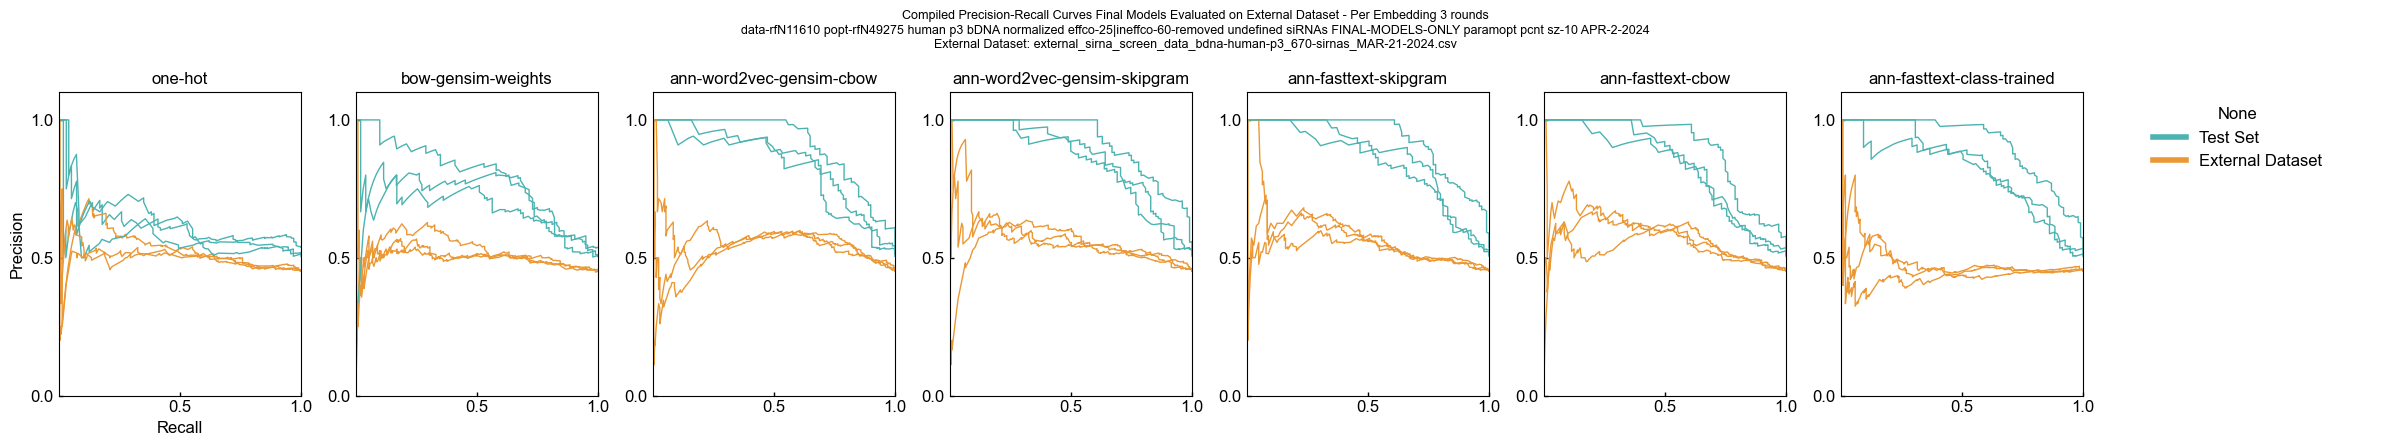

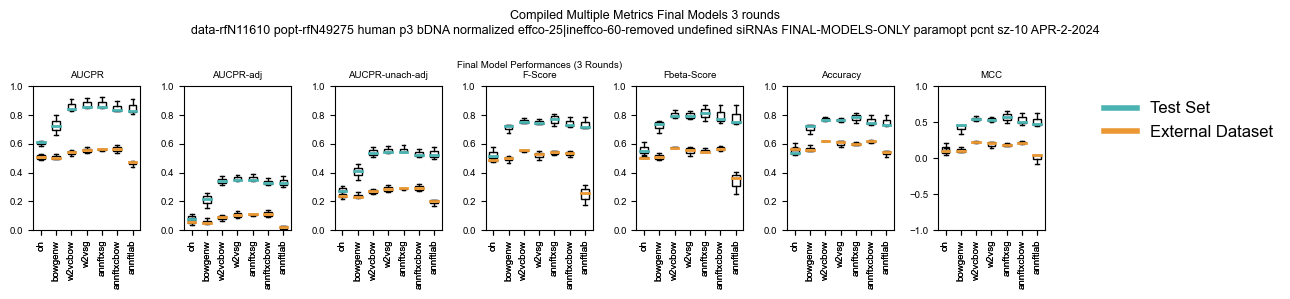

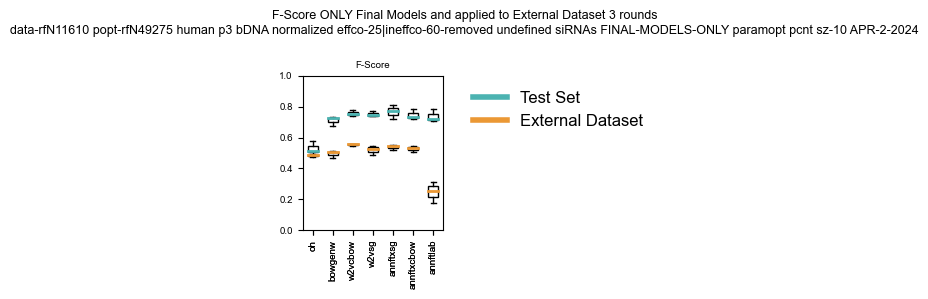

In [5]:
from data_representation import DataRepresentationBuilder

drb = DataRepresentationBuilder(
    model_type__='random-forest',
    parameter_to_optimize__='None',
    run_param_optimization__ = False,
    use_existing_processed_dataset__ = False,
    custom_parameter_values_to_loop__=[],
    num_rerurun_model_building__=3,
    kmer_size__=9,
    flank_len__=20,

    encoding_ls__=[
        'one-hot',
        'bow-gensim-weights',
        'ann-word2vec-gensim-cbow',
        'ann-word2vec-gensim-skipgram',
        'ann-fasttext-skipgram',
        'ann-fasttext-cbow',
        'ann-fasttext-class-trained',
        # 'bow-countvect', # TODO: DEBUG there is something wrong, taking very long to run (infinite looping?)
    ],
    input_data_dir__ = 'new_input_data/',
    apply_final_models_to_external_dataset__ = True,
    

    input_data_file__ = train_data_file.replace('new_input_data/',''),
    #input_data_file__ = subset_training_data_file.replace('new_input_data/',''),
    #input_data_file__ = ext_data_file.replace('new_input_data/',''),
    
    external_data_file__ = ext_data_file.replace('new_input_data/',''),
    #external_data_file__ = subset_training_data_file.replace('new_input_data/',''),

    
)



# Build Model with Smaller Training Dataset 
***(but same data - and apply to External Dataset)***




IMPORTANT: run_param_optimization__ is set to (False) so will not be running parameter optimization(will only be building final models). Any mention of parameter optimization from Constructor can be ignored.






NOTE: running without optimizing any parameters






NOTE: parameter_to_optimize = (None) if this parameter was set in the input, it will be ignored!	 Instead will consider these parameter values: [ ]



Date set successfully! APR-2-2024

Creating processed datasets...

	 all_data_label_str_ = human_p3_bDNA_normalized_effco-25|ineffco-60-removed_undefined_siRNAs
	 abbrev_all_data_label_str_ = h_p3_bDNA_oh-bowgenw-w2vcbow-w2vsg-annftxsg-annftxcbow-annftlab_norm_25-60-rm-u
Creating processed datasets...
Successfully read in .csv data



Successfully read in - 670 siRNAs
P3    670
Name: chemical_scaffold, dtype: int64

bDNA    670
Name: screen_type, dtype: int64

human    670
Name: species, dtype: int64
Selecting data with screen type:
 ['bDNA']
Selecting data with species:


Read 0M words
Number of words:  30104
Number of labels: 0
Progress: 100.0% words/sec/thread:   23705 lr:  0.000000 avg.loss:  1.286591 ETA:   0h 0m 0s


encoding: ann-fasttext-cbow


Read 0M words
Number of words:  30104
Number of labels: 0
Progress: 100.0% words/sec/thread:  113845 lr:  0.000000 avg.loss:  3.419106 ETA:   0h 0m 0s
Read 0M words
Number of words:  18546
Number of labels: 3


encoding: ann-fasttext-class-trained


Progress: 100.0% words/sec/thread:  342454 lr:  0.000000 avg.loss:  1.102534 ETA:   0h 0m 0s




Encoded vector lengths:


one-hot	 bow-countvect	 bow-gensim	 bow-gensim-weights	 ann-keras	 ann-word2vec-gensim	 ann-word2vec-gensim-cbow	 ann-word2vec-gensim-skipgram	 ann-fasttext-cbow	 ann-fasttext-skipgram	 ann-fasttext-class-trained
240 	 54 		 120 		 120 		 120 		 120 		 120 		
240 	 54 		 120 		 120 		 120 		 120 		 120 		

Splitting Datasets into train/test/paramopt...
self.datasplit_id_ | Randomized 8-digit ID for this Set of Rounds:	 rfN11575
All datasets will be stored in:
 /Users/kmonopoli/Dropbox (UMass Medical School)/data_representation-sequences/cleaned_parameter_optimization/data_representation_parameter_optimizationoutput_model_fitting/
	data-rfN11575_h_p3_bDNA_oh-bowgenw-w2vcbow-w2vsg-annftxsg-annftxcbow-annftlab_norm_25-60-rm-u/
Data processing parameter data appeneded to: 
	 output_model_fitting/data-processing-param-index.csv
Figure saved to: output_model_fitting/data-rfN11575_h_p3_bDNA_oh-bowgenw-w2vcbow-w2vsg-annftxsg-annftxcbow-annftlab_norm_25-60-rm-u/figur


Computing Final fbeta_score with beta = 0.5

Evaluating performance on external dataset for model 2 / 3...


Computing Final fbeta_score with beta = 0.5



Final model 2 with encoding one-hot saved to: ~/

models/final_rf_model_rnd-2_oh.pickle

Computing Final fbeta_score with beta = 0.5

Evaluating performance on external dataset for model 2 / 3...


Computing Final fbeta_score with beta = 0.5



Final model 2 with encoding bow-gensim-weights saved to: ~/

models/final_rf_model_rnd-2_bowgenw.pickle

Computing Final fbeta_score with beta = 0.5

Evaluating performance on external dataset for model 2 / 3...


Computing Final fbeta_score with beta = 0.5



Final model 2 with encoding ann-word2vec-gensim-cbow saved to: ~/

models/final_rf_model_rnd-2_w2vcbow.pickle

Computing Final fbeta_score with beta = 0.5

Evaluating performance on external dataset for model 2 / 3...


Computing Final fbeta_score with beta = 0.5



Final model 2 with encoding ann-word2vec-gensim-skipgram saved to: ~/


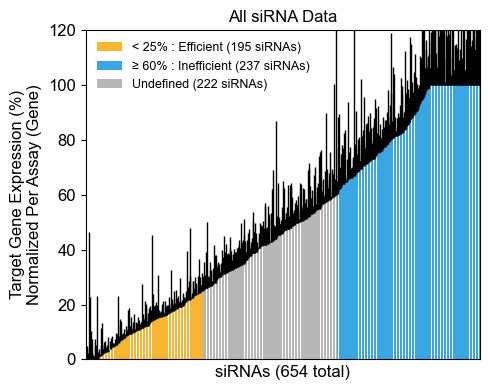

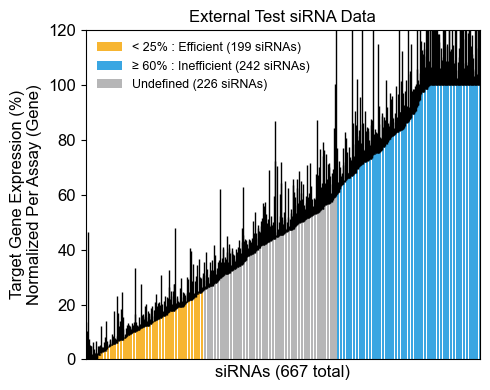

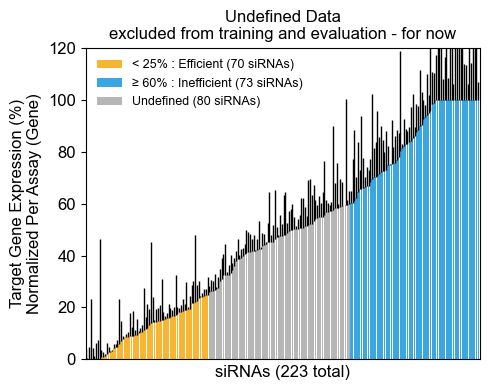

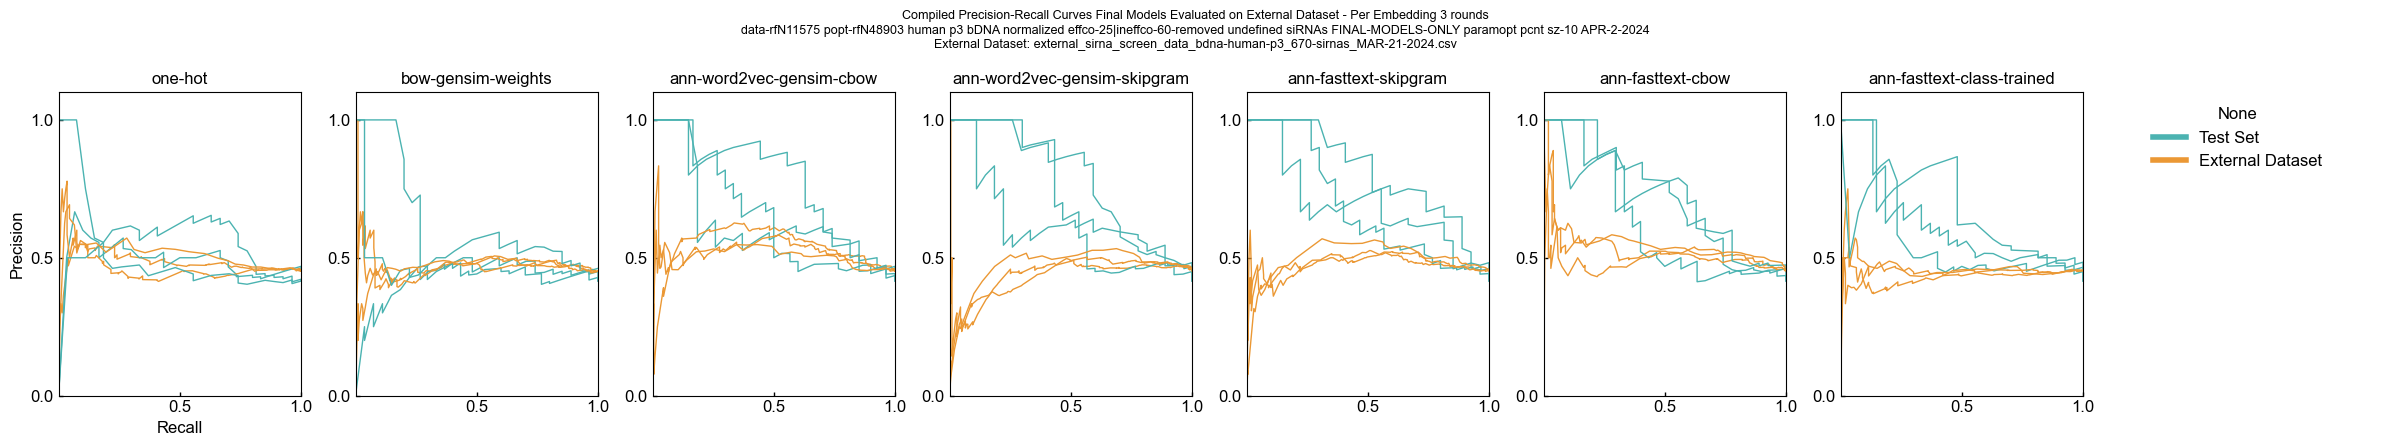

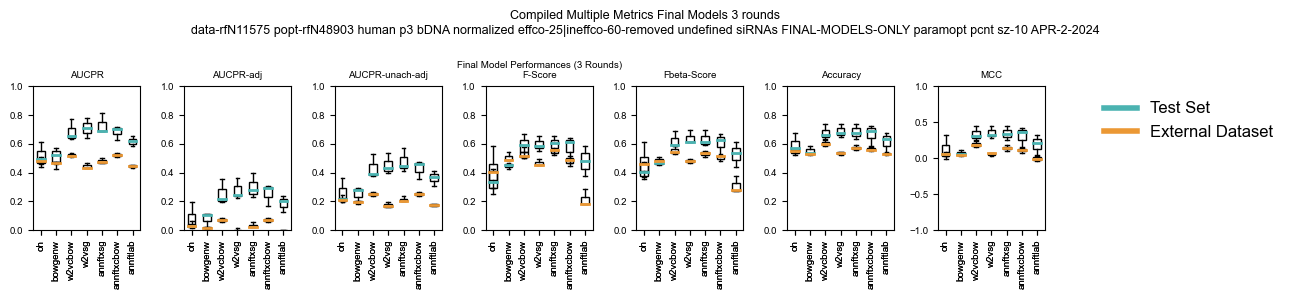

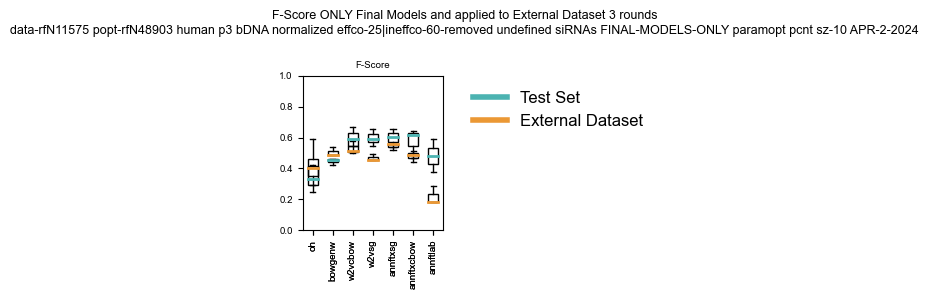

In [6]:
from data_representation import DataRepresentationBuilder

drb = DataRepresentationBuilder(
    model_type__='random-forest',
    parameter_to_optimize__='None',
    run_param_optimization__ = False,
    use_existing_processed_dataset__ = False,
    custom_parameter_values_to_loop__=[],
    num_rerurun_model_building__=3,
    kmer_size__=9,
    flank_len__=20,

    encoding_ls__=[
        'one-hot',
        'bow-gensim-weights',
        'ann-word2vec-gensim-cbow',
        'ann-word2vec-gensim-skipgram',
        'ann-fasttext-skipgram',
        'ann-fasttext-cbow',
        'ann-fasttext-class-trained',
        # 'bow-countvect', # TODO: DEBUG there is something wrong, taking very long to run (infinite looping?)
    ],
    input_data_dir__ = 'new_input_data/',
    apply_final_models_to_external_dataset__ = True,
    

    #input_data_file__ = train_data_file.replace('new_input_data/',''),
    input_data_file__ = subset_training_data_file.replace('new_input_data/',''),
    #input_data_file__ = ext_data_file.replace('new_input_data/',''),
    
    external_data_file__ = ext_data_file.replace('new_input_data/',''),
    #external_data_file__ = subset_training_data_file.replace('new_input_data/',''),

    
)






IMPORTANT: run_param_optimization__ is set to (False) so will not be running parameter optimization(will only be building final models). Any mention of parameter optimization from Constructor can be ignored.






NOTE: running without optimizing any parameters






NOTE: parameter_to_optimize = (None) if this parameter was set in the input, it will be ignored!	 Instead will consider these parameter values: [ ]



Date set successfully! APR-4-2024

Creating processed datasets...

	 all_data_label_str_ = human_p3_bDNA_normalized_effco-25|ineffco-60-removed_undefined_siRNAs
	 abbrev_all_data_label_str_ = h_p3_bDNA_oh-bowgenw-w2vcbow-w2vsg-annftxsg-annftxcbow-annftlab_norm_25-60-rm-u
Creating processed datasets...
Successfully read in .csv data



Successfully read in - 670 siRNAs
P3    670
Name: chemical_scaffold, dtype: int64

bDNA    670
Name: screen_type, dtype: int64

human    670
Name: species, dtype: int64
Selecting data with screen type:
 ['bDNA']
Selecting data with species:


Read 0M words
Number of words:  30104
Number of labels: 0
Progress: 100.1% words/sec/thread:   14302 lr: -0.000028 avg.loss:  1.245175 ETA:   0h 0m 0s

encoding: ann-fasttext-cbow


100.0% words/sec/thread:   14301 lr:  0.000000 avg.loss:  1.245175 ETA:   0h 0m 0s
Read 0M words
Number of words:  30104
Number of labels: 0
Progress: 100.0% words/sec/thread:   68898 lr:  0.000000 avg.loss:  3.457034 ETA:   0h 0m 0s


encoding: ann-fasttext-class-trained


Read 0M words
Number of words:  18546
Number of labels: 3
Progress: 100.0% words/sec/thread:  335280 lr:  0.000000 avg.loss:  1.102534 ETA:   0h 0m 0s




Encoded vector lengths:


one-hot	 bow-countvect	 bow-gensim	 bow-gensim-weights	 ann-keras	 ann-word2vec-gensim	 ann-word2vec-gensim-cbow	 ann-word2vec-gensim-skipgram	 ann-fasttext-cbow	 ann-fasttext-skipgram	 ann-fasttext-class-trained
240 	 54 		 120 		 120 		 120 		 120 		 120 		
240 	 54 		 120 		 120 		 120 		 120 		 120 		

Splitting Datasets into train/test/paramopt...
self.datasplit_id_ | Randomized 8-digit ID for this Set of Rounds:	 rfN42062
All datasets will be stored in:
 /Users/kmonopoli/Dropbox (UMass Medical School)/data_representation-sequences/cleaned_parameter_optimization/data_representation_parameter_optimizationoutput_model_fitting/
	data-rfN42062_h_p3_bDNA_oh-bowgenw-w2vcbow-w2vsg-annftxsg-annftxcbow-annftlab_norm_25-60-rm-u/
Data processing parameter data appeneded to: 
	 output_model_fitting/data-processing-param-index.csv
Figure saved to: output_model_fitting/data-rfN42062_h_p3_bDNA_oh-bowgenw-w2vcbow-w2vsg-annftxsg-annftxcbow-annftlab_norm_25-60-rm-u/figur


Computing Final fbeta_score with beta = 0.5

Evaluating performance on external dataset for model 2 / 3...


Computing Final fbeta_score with beta = 0.5



Final model 2 with encoding one-hot saved to: ~/

models/final_rf_model_rnd-2_oh.pickle

Computing Final fbeta_score with beta = 0.5

Evaluating performance on external dataset for model 2 / 3...


Computing Final fbeta_score with beta = 0.5



Final model 2 with encoding bow-gensim-weights saved to: ~/

models/final_rf_model_rnd-2_bowgenw.pickle

Computing Final fbeta_score with beta = 0.5

Evaluating performance on external dataset for model 2 / 3...


Computing Final fbeta_score with beta = 0.5



Final model 2 with encoding ann-word2vec-gensim-cbow saved to: ~/

models/final_rf_model_rnd-2_w2vcbow.pickle

Computing Final fbeta_score with beta = 0.5

Evaluating performance on external dataset for model 2 / 3...


Computing Final fbeta_score with beta = 0.5



Final model 2 with encoding ann-word2vec-gensim-skipgram saved to: ~/


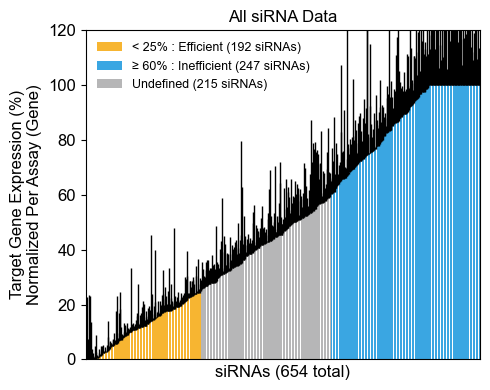

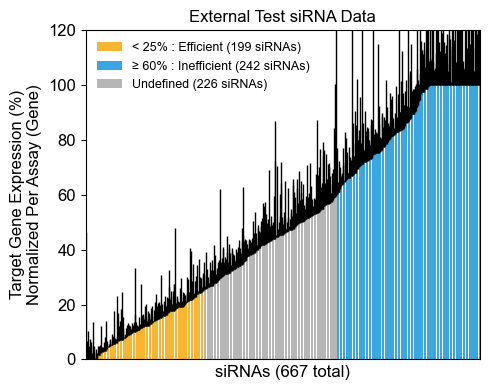

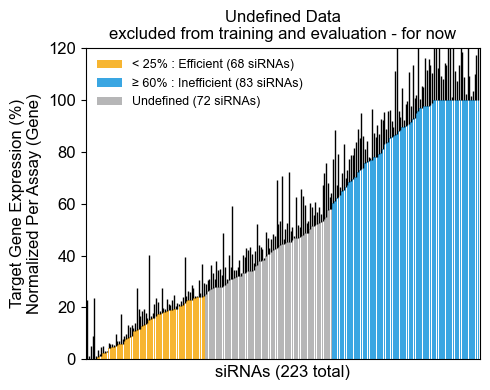

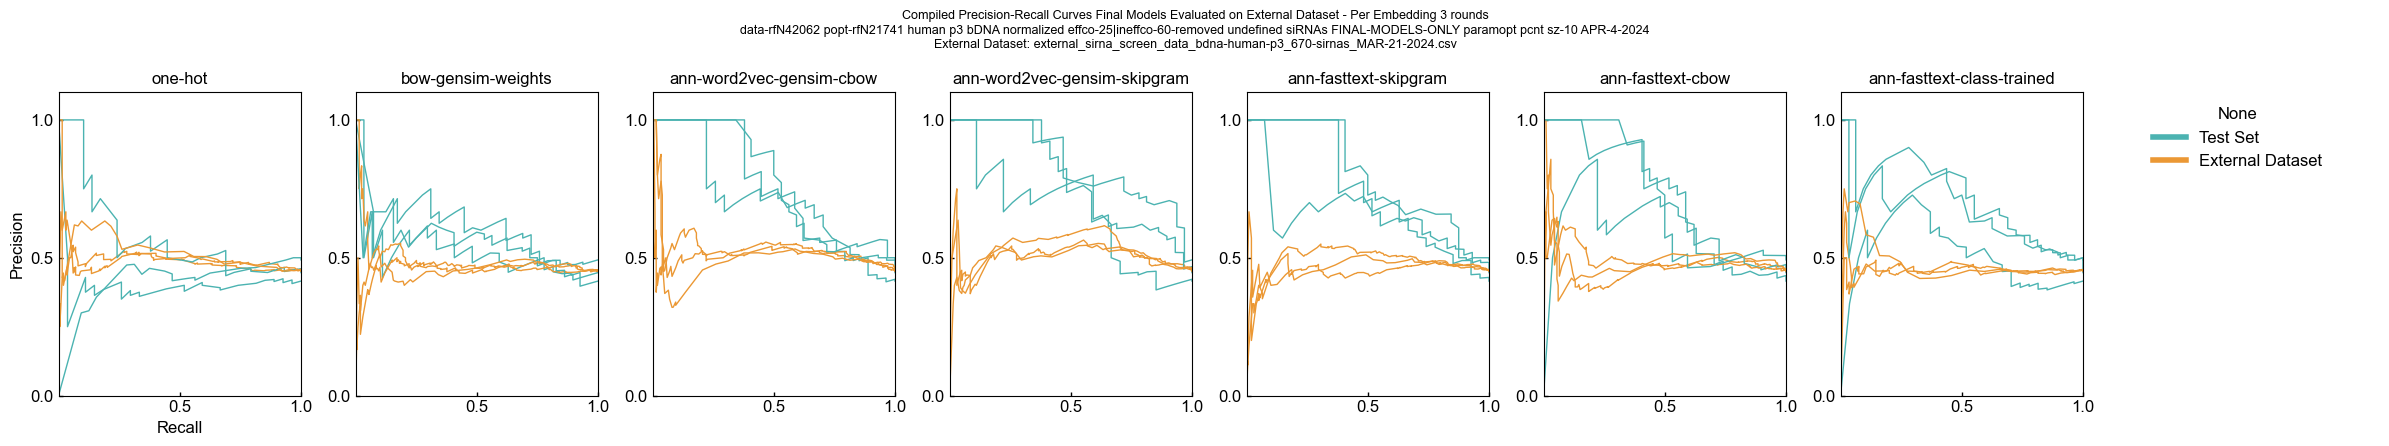

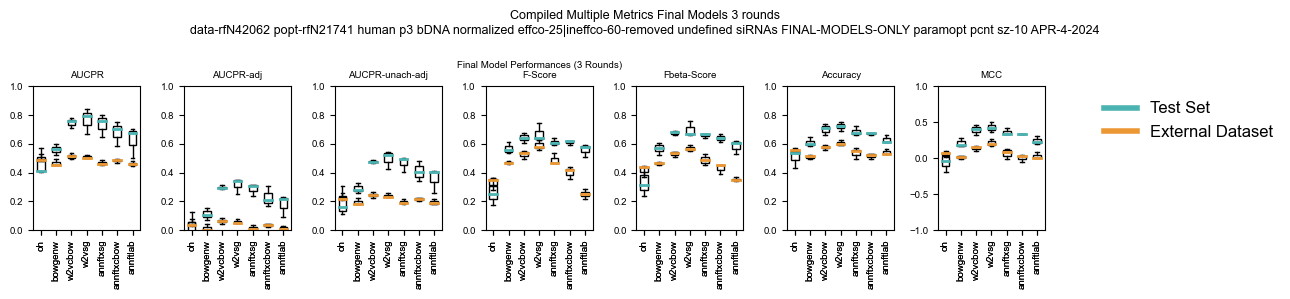

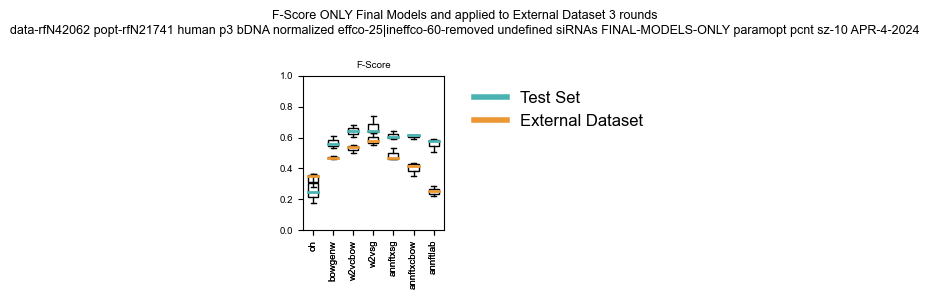

In [3]:
from data_representation import DataRepresentationBuilder

drb = DataRepresentationBuilder(
    model_type__='random-forest',
    parameter_to_optimize__='None',
    run_param_optimization__ = False,
    use_existing_processed_dataset__ = False,
    custom_parameter_values_to_loop__=[],
    num_rerurun_model_building__=3,
    kmer_size__=9,
    flank_len__=20,

    encoding_ls__=[
        'one-hot',
        'bow-gensim-weights',
        'ann-word2vec-gensim-cbow',
        'ann-word2vec-gensim-skipgram',
        'ann-fasttext-skipgram',
        'ann-fasttext-cbow',
        'ann-fasttext-class-trained',
        # 'bow-countvect', # TODO: DEBUG there is something wrong, taking very long to run (infinite looping?)
    ],
    input_data_dir__ = 'new_input_data/',
    apply_final_models_to_external_dataset__ = True,
    

    #input_data_file__ = train_data_file.replace('new_input_data/',''),
    input_data_file__ = subset_training_data_file.replace('new_input_data/',''),
    #input_data_file__ = ext_data_file.replace('new_input_data/',''),
    
    external_data_file__ = ext_data_file.replace('new_input_data/',''),
    #external_data_file__ = subset_training_data_file.replace('new_input_data/',''),

    
)



# Build Model with External Dataset 
***(and apply to Smaller Training Dataset)***




IMPORTANT: run_param_optimization__ is set to (False) so will not be running parameter optimization(will only be building final models). Any mention of parameter optimization from Constructor can be ignored.






NOTE: running without optimizing any parameters






NOTE: parameter_to_optimize = (None) if this parameter was set in the input, it will be ignored!	 Instead will consider these parameter values: [ ]



Date set successfully! APR-2-2024

Creating processed datasets...

	 all_data_label_str_ = human_p3_bDNA_normalized_effco-25|ineffco-60-removed_undefined_siRNAs
	 abbrev_all_data_label_str_ = h_p3_bDNA_oh-bowgenw-w2vcbow-w2vsg-annftxsg-annftxcbow-annftlab_norm_25-60-rm-u
Creating processed datasets...
Successfully read in .csv data



Successfully read in - 670 siRNAs
P3    670
Name: chemical_scaffold, dtype: int64

bDNA    670
Name: screen_type, dtype: int64

human    670
Name: species, dtype: int64
Selecting data with screen type:
 ['bDNA']
Selecting data with species:


Read 0M words
Number of words:  30104
Number of labels: 0
Progress: 100.0% words/sec/thread:   22271 lr:  0.000000 avg.loss:  1.272917 ETA:   0h 0m 0s 26.6% words/sec/thread:   22950 lr:  0.036682 avg.loss:  2.691694 ETA:   0h 0m 2s
Read 0M words
Number of words:  30104
Number of labels: 0


encoding: ann-fasttext-cbow


Progress: 100.0% words/sec/thread:  112914 lr:  0.000000 avg.loss:  3.427131 ETA:   0h 0m 0s


encoding: ann-fasttext-class-trained


Read 0M words
Number of words:  13631
Number of labels: 3
Progress: 100.0% words/sec/thread:  357939 lr:  0.000000 avg.loss:  1.102534 ETA:   0h 0m 0s




Encoded vector lengths:


one-hot	 bow-countvect	 bow-gensim	 bow-gensim-weights	 ann-keras	 ann-word2vec-gensim	 ann-word2vec-gensim-cbow	 ann-word2vec-gensim-skipgram	 ann-fasttext-cbow	 ann-fasttext-skipgram	 ann-fasttext-class-trained
240 	 54 		 120 		 120 		 120 		 120 		 120 		
240 	 54 		 120 		 120 		 120 		 120 		 120 		

Splitting Datasets into train/test/paramopt...
self.datasplit_id_ | Randomized 8-digit ID for this Set of Rounds:	 rfN36169
All datasets will be stored in:
 /Users/kmonopoli/Dropbox (UMass Medical School)/data_representation-sequences/cleaned_parameter_optimization/data_representation_parameter_optimizationoutput_model_fitting/
	data-rfN36169_h_p3_bDNA_oh-bowgenw-w2vcbow-w2vsg-annftxsg-annftxcbow-annftlab_norm_25-60-rm-u/
Data processing parameter data appeneded to: 
	 output_model_fitting/data-processing-param-index.csv
Figure saved to: output_model_fitting/data-rfN36169_h_p3_bDNA_oh-bowgenw-w2vcbow-w2vsg-annftxsg-annftxcbow-annftlab_norm_25-60-rm-u/figur


Computing Final fbeta_score with beta = 0.5

Evaluating performance on external dataset for model 2 / 3...


Computing Final fbeta_score with beta = 0.5



Final model 2 with encoding one-hot saved to: ~/

models/final_rf_model_rnd-2_oh.pickle

Computing Final fbeta_score with beta = 0.5

Evaluating performance on external dataset for model 2 / 3...


Computing Final fbeta_score with beta = 0.5



Final model 2 with encoding bow-gensim-weights saved to: ~/

models/final_rf_model_rnd-2_bowgenw.pickle

Computing Final fbeta_score with beta = 0.5

Evaluating performance on external dataset for model 2 / 3...


Computing Final fbeta_score with beta = 0.5



Final model 2 with encoding ann-word2vec-gensim-cbow saved to: ~/

models/final_rf_model_rnd-2_w2vcbow.pickle

Computing Final fbeta_score with beta = 0.5

Evaluating performance on external dataset for model 2 / 3...


Computing Final fbeta_score with beta = 0.5



Final model 2 with encoding ann-word2vec-gensim-skipgram saved to: ~/


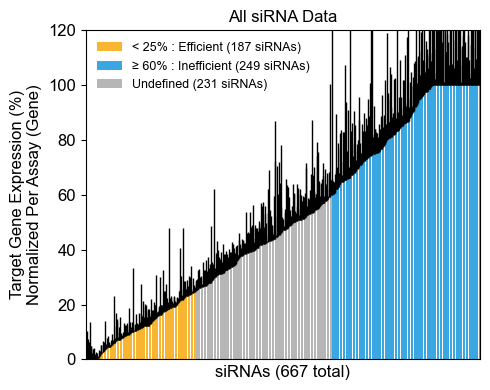

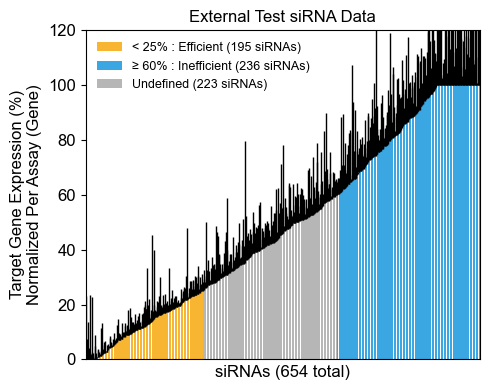

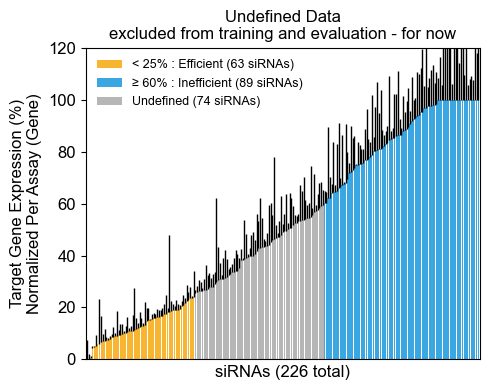

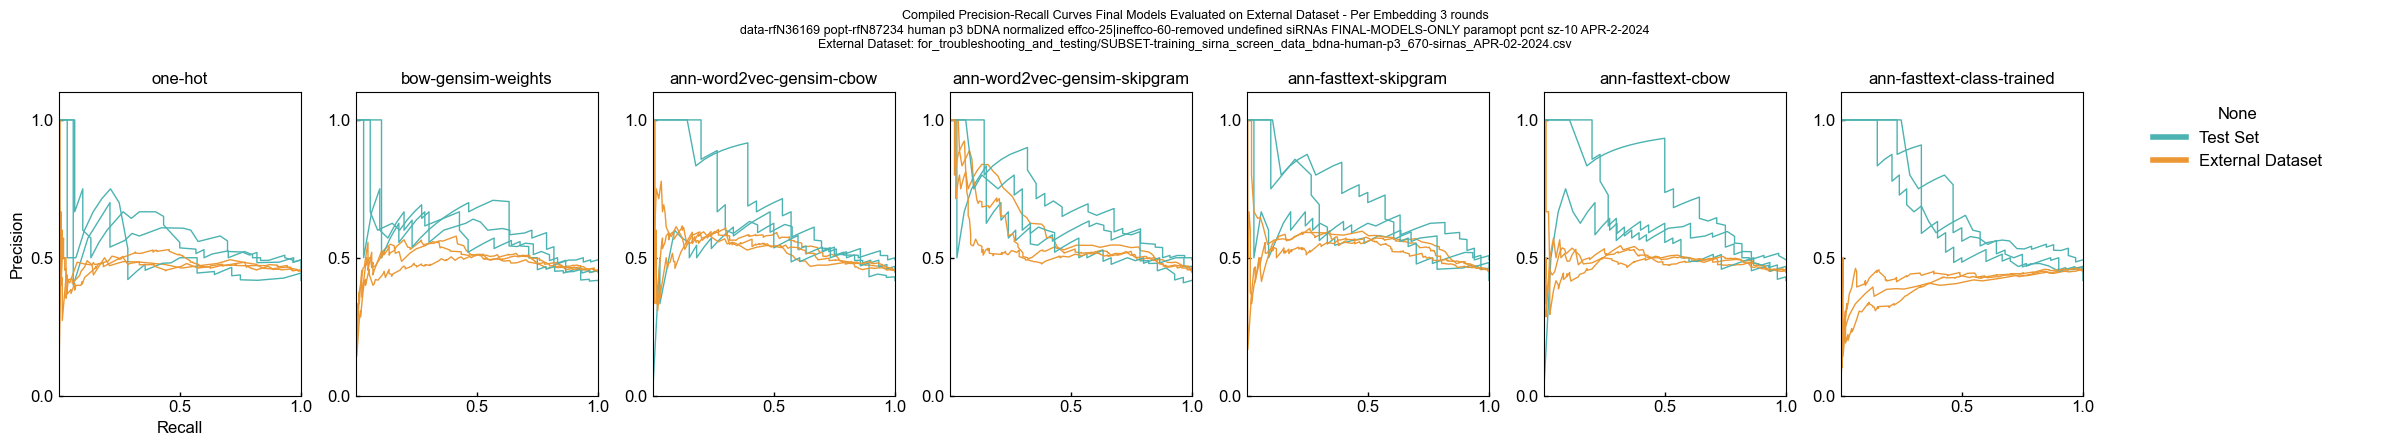

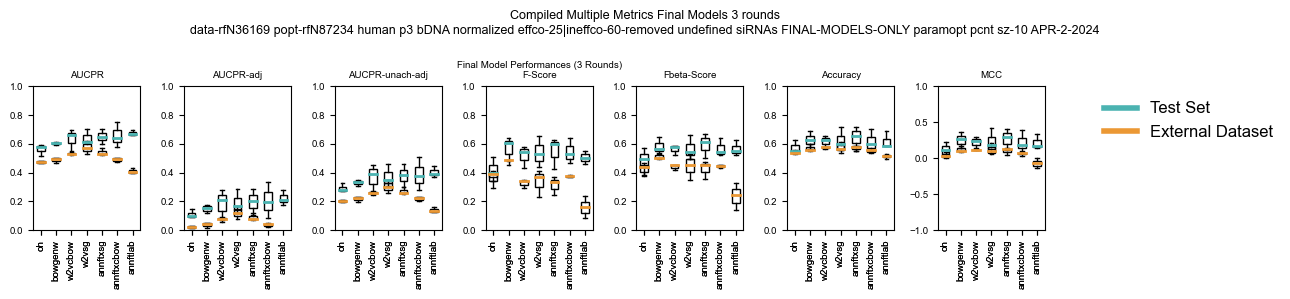

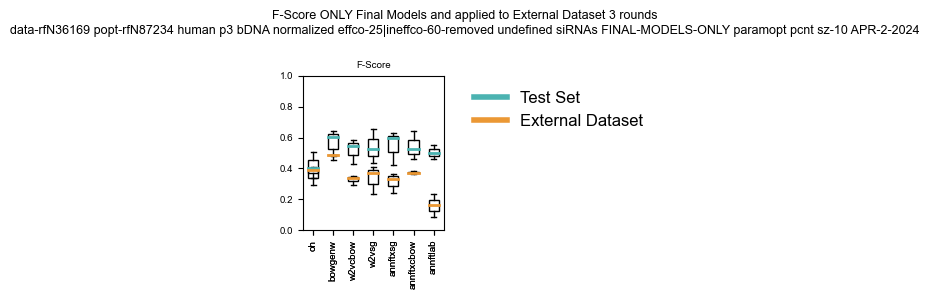

In [7]:
from data_representation import DataRepresentationBuilder

drb = DataRepresentationBuilder(
    model_type__='random-forest',
    parameter_to_optimize__='None',
    run_param_optimization__ = False,
    use_existing_processed_dataset__ = False,
    custom_parameter_values_to_loop__=[],
    num_rerurun_model_building__=3,
    kmer_size__=9,
    flank_len__=20,

    encoding_ls__=[
        'one-hot',
        'bow-gensim-weights',
        'ann-word2vec-gensim-cbow',
        'ann-word2vec-gensim-skipgram',
        'ann-fasttext-skipgram',
        'ann-fasttext-cbow',
        'ann-fasttext-class-trained',
        # 'bow-countvect', # TODO: DEBUG there is something wrong, taking very long to run (infinite looping?)
    ],
    input_data_dir__ = 'new_input_data/',
    apply_final_models_to_external_dataset__ = True,
    

    #input_data_file__ = train_data_file.replace('new_input_data/',''),
    #input_data_file__ = subset_training_data_file.replace('new_input_data/',''),
    input_data_file__ = ext_data_file.replace('new_input_data/',''),
    
    #external_data_file__ = ext_data_file.replace('new_input_data/',''),
    external_data_file__ = subset_training_data_file.replace('new_input_data/',''),

    
)



# Build Model with Smaller Training Dataset 
## INCLUDE MIDDLE VALUES IN TRAINING MODEL EVALUATION
***(but same data - and apply to External Dataset)***




IMPORTANT: run_param_optimization__ is set to (False) so will not be running parameter optimization(will only be building final models). Any mention of parameter optimization from Constructor can be ignored.






NOTE: running without optimizing any parameters






NOTE: parameter_to_optimize = (None) if this parameter was set in the input, it will be ignored!	 Instead will consider these parameter values: [ ]



Date set successfully! APR-4-2024

Creating processed datasets...

	 all_data_label_str_ = human_p3_bDNA_normalized_effco-25|ineffco-26-retained_undefined_siRNAs
	 abbrev_all_data_label_str_ = h_p3_bDNA_oh-bowgenw-w2vcbow-w2vsg-annftxsg-annftxcbow-annftlab_norm_25-26-kp-u
Creating processed datasets...
Successfully read in .csv data



Successfully read in - 670 siRNAs
P3    670
Name: chemical_scaffold, dtype: int64

bDNA    670
Name: screen_type, dtype: int64

human    670
Name: species, dtype: int64
Selecting data with screen type:
 ['bDNA']
Selecting data with species:

Read 0M words
Number of words:  30104
Number of labels: 0
Progress: 100.0% words/sec/thread:   15274 lr: -0.000043 avg.loss:  1.274960 ETA:   0h 0m 0s 73.9% words/sec/thread:   16919 lr:  0.013063 avg.loss:  1.546156 ETA:   0h 0m 1s% words/sec/thread:   15273 lr:  0.000000 avg.loss:  1.274960 ETA:   0h 0m 0s
Read 0M words
Number of words:  30104
Number of labels: 0


encoding: ann-fasttext-cbow


Progress: 100.0% words/sec/thread:   75877 lr:  0.000000 avg.loss:  3.450428 ETA:   0h 0m 0s


encoding: ann-fasttext-class-trained


Read 0M words
Number of words:  18546
Number of labels: 3
Progress: 100.0% words/sec/thread:  348905 lr:  0.000000 avg.loss:  1.102534 ETA:   0h 0m 0s




Encoded vector lengths:


one-hot	 bow-countvect	 bow-gensim	 bow-gensim-weights	 ann-keras	 ann-word2vec-gensim	 ann-word2vec-gensim-cbow	 ann-word2vec-gensim-skipgram	 ann-fasttext-cbow	 ann-fasttext-skipgram	 ann-fasttext-class-trained
240 	 54 		 120 		 120 		 120 		 120 		 120 		
240 	 54 		 120 		 120 		 120 		 120 		 120 		

Splitting Datasets into train/test/paramopt...
self.datasplit_id_ | Randomized 8-digit ID for this Set of Rounds:	 rfN93066
All datasets will be stored in:
 /Users/kmonopoli/Dropbox (UMass Medical School)/data_representation-sequences/cleaned_parameter_optimization/data_representation_parameter_optimizationoutput_model_fitting/
	data-rfN93066_h_p3_bDNA_oh-bowgenw-w2vcbow-w2vsg-annftxsg-annftxcbow-annftlab_norm_25-26-kp-u/
Data processing parameter data appeneded to: 
	 output_model_fitting/data-processing-param-index.csv
Figure saved to: output_model_fitting/data-rfN93066_h_p3_bDNA_oh-bowgenw-w2vcbow-w2vsg-annftxsg-annftxcbow-annftlab_norm_25-26-kp-u/figur


Computing Final fbeta_score with beta = 0.5

Evaluating performance on external dataset for model 2 / 3...


Computing Final fbeta_score with beta = 0.5



Final model 2 with encoding one-hot saved to: ~/

models/final_rf_model_rnd-2_oh.pickle

Computing Final fbeta_score with beta = 0.5

Evaluating performance on external dataset for model 2 / 3...


Computing Final fbeta_score with beta = 0.5



Final model 2 with encoding bow-gensim-weights saved to: ~/

models/final_rf_model_rnd-2_bowgenw.pickle

Computing Final fbeta_score with beta = 0.5

Evaluating performance on external dataset for model 2 / 3...


Computing Final fbeta_score with beta = 0.5



Final model 2 with encoding ann-word2vec-gensim-cbow saved to: ~/

models/final_rf_model_rnd-2_w2vcbow.pickle

Computing Final fbeta_score with beta = 0.5

Evaluating performance on external dataset for model 2 / 3...


Computing Final fbeta_score with beta = 0.5



Final model 2 with encoding ann-word2vec-gensim-skipgram saved to: ~/


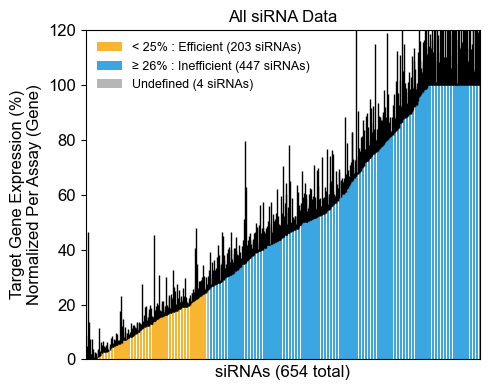

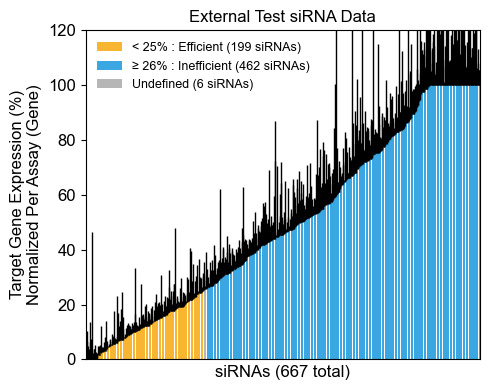

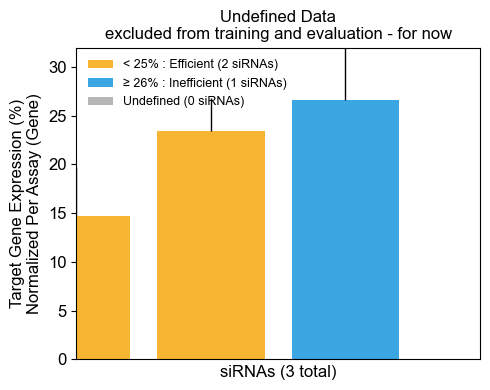

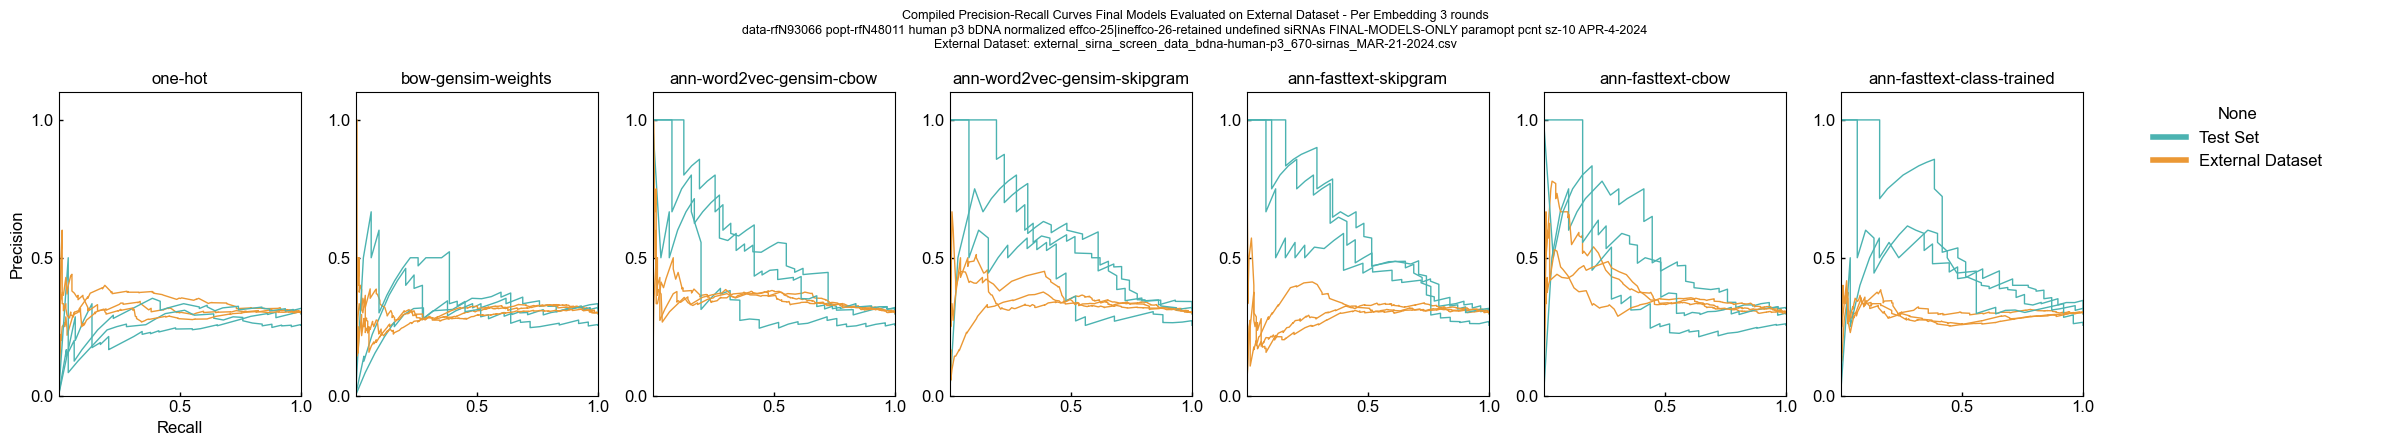

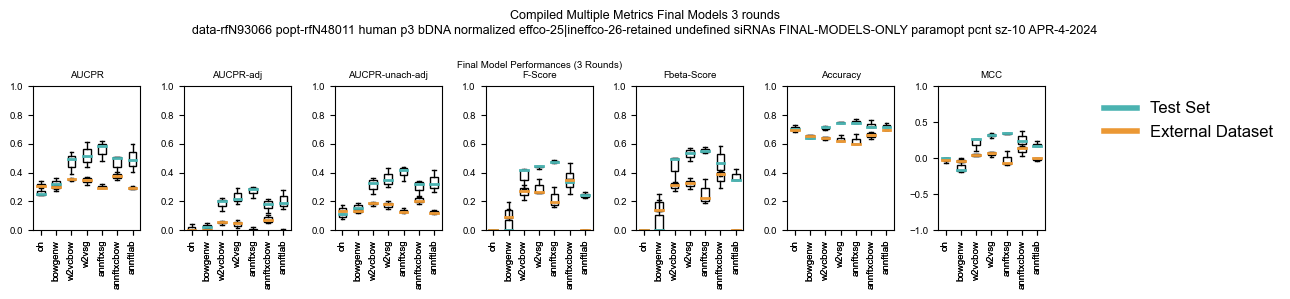

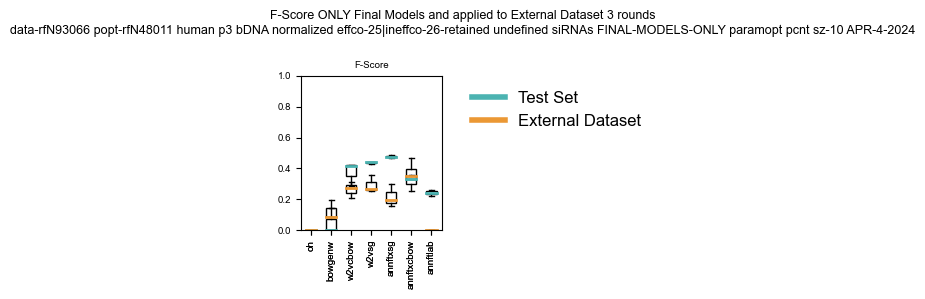

In [5]:
from data_representation import DataRepresentationBuilder

drb = DataRepresentationBuilder(
    model_type__='random-forest',
    parameter_to_optimize__='None',
    run_param_optimization__ = False,
    use_existing_processed_dataset__ = False,
    custom_parameter_values_to_loop__=[],
    num_rerurun_model_building__=3,
    kmer_size__=9,
    flank_len__=20,

    encoding_ls__=[
        'one-hot',
        'bow-gensim-weights',
        'ann-word2vec-gensim-cbow',
        'ann-word2vec-gensim-skipgram',
        'ann-fasttext-skipgram',
        'ann-fasttext-cbow',
        'ann-fasttext-class-trained',
        # 'bow-countvect', # TODO: DEBUG there is something wrong, taking very long to run (infinite looping?)
    ],
    input_data_dir__ = 'new_input_data/',
    apply_final_models_to_external_dataset__ = True,
    

    #input_data_file__ = train_data_file.replace('new_input_data/',''),
    input_data_file__ = subset_training_data_file.replace('new_input_data/',''),
    #input_data_file__ = ext_data_file.replace('new_input_data/',''),
    
    remove_undefined__ = False,
    
    effco__=25, # 25, 
    ineffco__=26, # 60,
    
    external_data_file__ = ext_data_file.replace('new_input_data/',''),
    #external_data_file__ = subset_training_data_file.replace('new_input_data/',''),

    
)






IMPORTANT: run_param_optimization__ is set to (False) so will not be running parameter optimization(will only be building final models). Any mention of parameter optimization from Constructor can be ignored.






NOTE: running without optimizing any parameters






NOTE: parameter_to_optimize = (None) if this parameter was set in the input, it will be ignored!	 Instead will consider these parameter values: [ ]



Date set successfully! APR-4-2024

Creating processed datasets...

	 all_data_label_str_ = human_p3_bDNA_normalized_effco-25|ineffco-60-retained_undefined_siRNAs
	 abbrev_all_data_label_str_ = h_p3_bDNA_oh-bowgenw-w2vcbow-w2vsg-annftxsg-annftxcbow-annftlab_norm_25-60-kp-u
Creating processed datasets...
Successfully read in .csv data



Successfully read in - 670 siRNAs
P3    670
Name: chemical_scaffold, dtype: int64

bDNA    670
Name: screen_type, dtype: int64

human    670
Name: species, dtype: int64
Selecting data with screen type:
 ['bDNA']
Selecting data with species:

Read 0M words
Number of words:  30104
Number of labels: 0
Progress: 100.0% words/sec/thread:   13787 lr:  0.000000 avg.loss:  1.258274 ETA:   0h 0m 0s
Read 0M words
Number of words:  30104
Number of labels: 0


encoding: ann-fasttext-cbow


Progress: 100.0% words/sec/thread:   76568 lr:  0.000000 avg.loss:  3.437238 ETA:   0h 0m 0s
Read 0M words
Number of words:  18546
Number of labels: 3


encoding: ann-fasttext-class-trained


Progress: 100.0% words/sec/thread:  173350 lr:  0.000000 avg.loss:  1.102534 ETA:   0h 0m 0s




Encoded vector lengths:


one-hot	 bow-countvect	 bow-gensim	 bow-gensim-weights	 ann-keras	 ann-word2vec-gensim	 ann-word2vec-gensim-cbow	 ann-word2vec-gensim-skipgram	 ann-fasttext-cbow	 ann-fasttext-skipgram	 ann-fasttext-class-trained
240 	 54 		 120 		 120 		 120 		 120 		 120 		
240 	 54 		 120 		 120 		 120 		 120 		 120 		

Splitting Datasets into train/test/paramopt...
self.datasplit_id_ | Randomized 8-digit ID for this Set of Rounds:	 rfN99670
All datasets will be stored in:
 /Users/kmonopoli/Dropbox (UMass Medical School)/data_representation-sequences/cleaned_parameter_optimization/data_representation_parameter_optimizationoutput_model_fitting/
	data-rfN99670_h_p3_bDNA_oh-bowgenw-w2vcbow-w2vsg-annftxsg-annftxcbow-annftlab_norm_25-60-kp-u/
Data processing parameter data appeneded to: 
	 output_model_fitting/data-processing-param-index.csv
Figure saved to: output_model_fitting/data-rfN99670_h_p3_bDNA_oh-bowgenw-w2vcbow-w2vsg-annftxsg-annftxcbow-annftlab_norm_25-60-kp-u/figur


Computing Final fbeta_score with beta = 0.5

Evaluating performance on external dataset for model 1 / 3...


Computing Final fbeta_score with beta = 0.5



Final model 1 with encoding ann-fasttext-class-trained saved to: ~/

models/final_rf_model_rnd-1_annftlab.pickle
Building Final random-forest models for Round: 2 / 3
Including additional evaluation on external dataset: output_model_fitting/data-rfN99670_h_p3_bDNA_oh-bowgenw-w2vcbow-w2vsg-annftxsg-annftxcbow-annftlab_norm_25-60-kp-u/labeled_data_from_external_test_dataset_partition.csv

Computing Final fbeta_score with beta = 0.5

Evaluating performance on external dataset for model 2 / 3...


Computing Final fbeta_score with beta = 0.5



Final model 2 with encoding one-hot saved to: ~/

models/final_rf_model_rnd-2_oh.pickle

Computing Final fbeta_score with beta = 0.5

Evaluating performance on external dataset for model 2 / 3...


Computing Final fbeta_score with beta = 0.5



Final model 2 with encoding bow-gensim-weights saved 

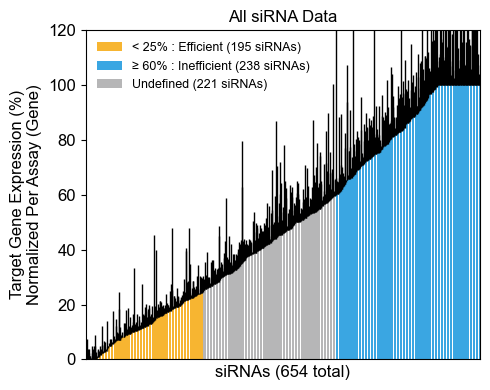

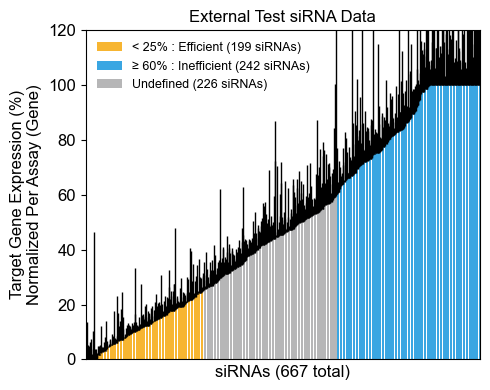

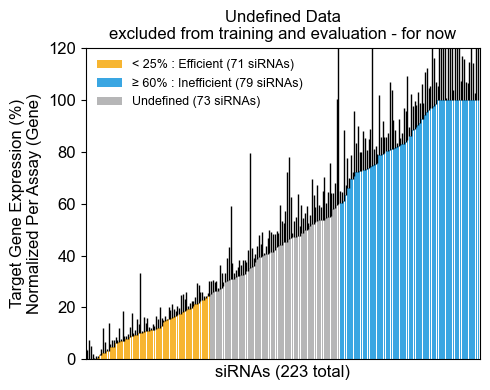

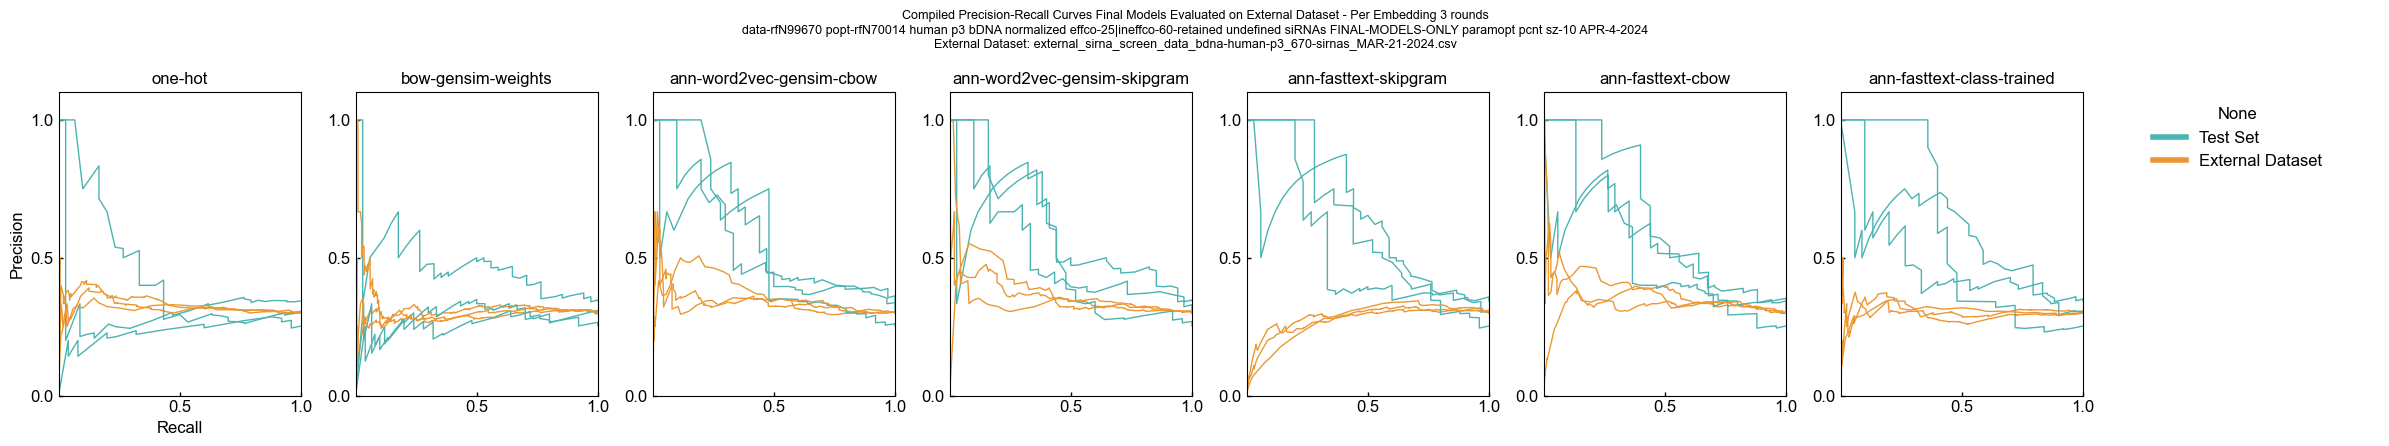

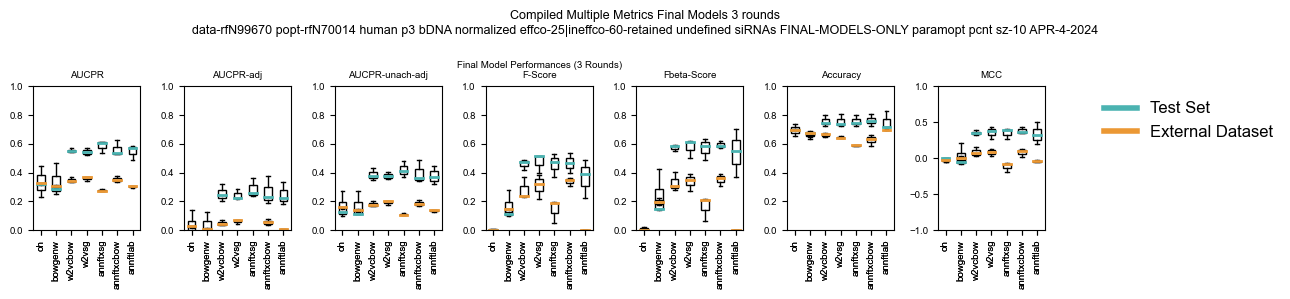

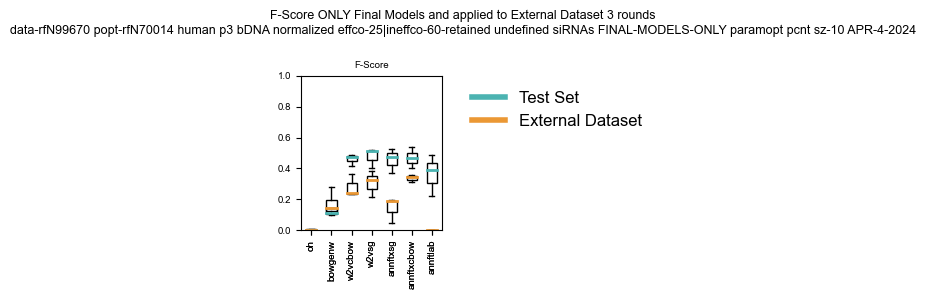

In [2]:
from data_representation import DataRepresentationBuilder

drb = DataRepresentationBuilder(
    model_type__='random-forest',
    parameter_to_optimize__='None',
    run_param_optimization__ = False,
    use_existing_processed_dataset__ = False,
    custom_parameter_values_to_loop__=[],
    num_rerurun_model_building__=3,
    kmer_size__=9,
    flank_len__=20,

    encoding_ls__=[
        'one-hot',
        'bow-gensim-weights',
        'ann-word2vec-gensim-cbow',
        'ann-word2vec-gensim-skipgram',
        'ann-fasttext-skipgram',
        'ann-fasttext-cbow',
        'ann-fasttext-class-trained',
        # 'bow-countvect', # TODO: DEBUG there is something wrong, taking very long to run (infinite looping?)
    ],
    input_data_dir__ = 'new_input_data/',
    apply_final_models_to_external_dataset__ = True,
    

    #input_data_file__ = train_data_file.replace('new_input_data/',''),
    input_data_file__ = subset_training_data_file.replace('new_input_data/',''),
    #input_data_file__ = ext_data_file.replace('new_input_data/',''),
    
    remove_undefined__ = False,
    
    effco__=25, 
    ineffco__=60,
    
    external_data_file__ = ext_data_file.replace('new_input_data/',''),
    #external_data_file__ = subset_training_data_file.replace('new_input_data/',''),

    
)



# Build Model with External Dataset 
## INCLUDE MIDDLE VALUES IN TRAINING MODEL EVALUATION

***(and apply to Smaller Training Dataset)***




IMPORTANT: run_param_optimization__ is set to (False) so will not be running parameter optimization(will only be building final models). Any mention of parameter optimization from Constructor can be ignored.






NOTE: running without optimizing any parameters






NOTE: parameter_to_optimize = (None) if this parameter was set in the input, it will be ignored!	 Instead will consider these parameter values: [ ]



Date set successfully! APR-4-2024

Creating processed datasets...

	 all_data_label_str_ = human_p3_bDNA_normalized_effco-25|ineffco-26-retained_undefined_siRNAs
	 abbrev_all_data_label_str_ = h_p3_bDNA_oh-bowgenw-w2vcbow-w2vsg-annftxsg-annftxcbow-annftlab_norm_25-26-kp-u
Creating processed datasets...
Successfully read in .csv data



Successfully read in - 670 siRNAs
P3    670
Name: chemical_scaffold, dtype: int64

bDNA    670
Name: screen_type, dtype: int64

human    670
Name: species, dtype: int64
Selecting data with screen type:
 ['bDNA']
Selecting data with species:

Read 0M words
Number of words:  30104
Number of labels: 0
Progress: 100.0% words/sec/thread:   20705 lr:  0.000000 avg.loss:  1.275017 ETA:   0h 0m 0s
Read 0M words
Number of words:  30104
Number of labels: 0


encoding: ann-fasttext-cbow


Progress: 100.0% words/sec/thread:   95927 lr:  0.000000 avg.loss:  3.464001 ETA:   0h 0m 0s
Read 0M words
Number of words:  13631
Number of labels: 3


encoding: ann-fasttext-class-trained


Progress: 100.0% words/sec/thread:  350330 lr:  0.000000 avg.loss:  1.102534 ETA:   0h 0m 0s




Encoded vector lengths:


one-hot	 bow-countvect	 bow-gensim	 bow-gensim-weights	 ann-keras	 ann-word2vec-gensim	 ann-word2vec-gensim-cbow	 ann-word2vec-gensim-skipgram	 ann-fasttext-cbow	 ann-fasttext-skipgram	 ann-fasttext-class-trained
240 	 54 		 120 		 120 		 120 		 120 		 120 		
240 	 54 		 120 		 120 		 120 		 120 		 120 		

Splitting Datasets into train/test/paramopt...
self.datasplit_id_ | Randomized 8-digit ID for this Set of Rounds:	 rfN66899
All datasets will be stored in:
 /Users/kmonopoli/Dropbox (UMass Medical School)/data_representation-sequences/cleaned_parameter_optimization/data_representation_parameter_optimizationoutput_model_fitting/
	data-rfN66899_h_p3_bDNA_oh-bowgenw-w2vcbow-w2vsg-annftxsg-annftxcbow-annftlab_norm_25-26-kp-u/
Data processing parameter data appeneded to: 
	 output_model_fitting/data-processing-param-index.csv
Figure saved to: output_model_fitting/data-rfN66899_h_p3_bDNA_oh-bowgenw-w2vcbow-w2vsg-annftxsg-annftxcbow-annftlab_norm_25-26-kp-u/figur


Computing Final fbeta_score with beta = 0.5

Evaluating performance on external dataset for model 2 / 3...


Computing Final fbeta_score with beta = 0.5



Final model 2 with encoding one-hot saved to: ~/

models/final_rf_model_rnd-2_oh.pickle

Computing Final fbeta_score with beta = 0.5

Evaluating performance on external dataset for model 2 / 3...


Computing Final fbeta_score with beta = 0.5



Final model 2 with encoding bow-gensim-weights saved to: ~/

models/final_rf_model_rnd-2_bowgenw.pickle

Computing Final fbeta_score with beta = 0.5

Evaluating performance on external dataset for model 2 / 3...


Computing Final fbeta_score with beta = 0.5



Final model 2 with encoding ann-word2vec-gensim-cbow saved to: ~/

models/final_rf_model_rnd-2_w2vcbow.pickle

Computing Final fbeta_score with beta = 0.5

Evaluating performance on external dataset for model 2 / 3...


Computing Final fbeta_score with beta = 0.5



Final model 2 with encoding ann-word2vec-gensim-skipgram saved to: ~/


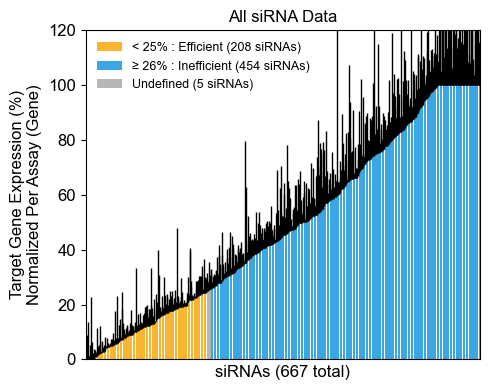

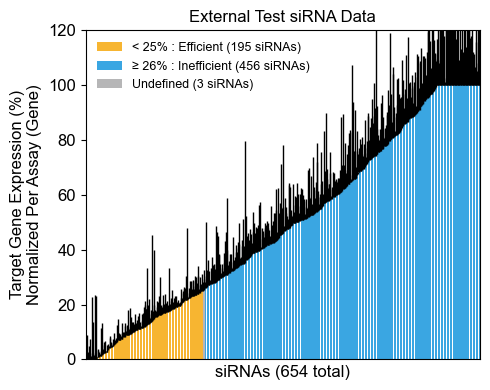

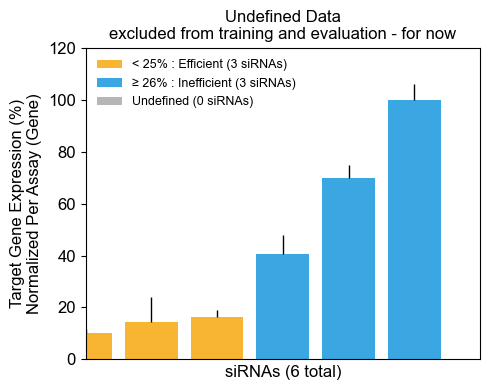

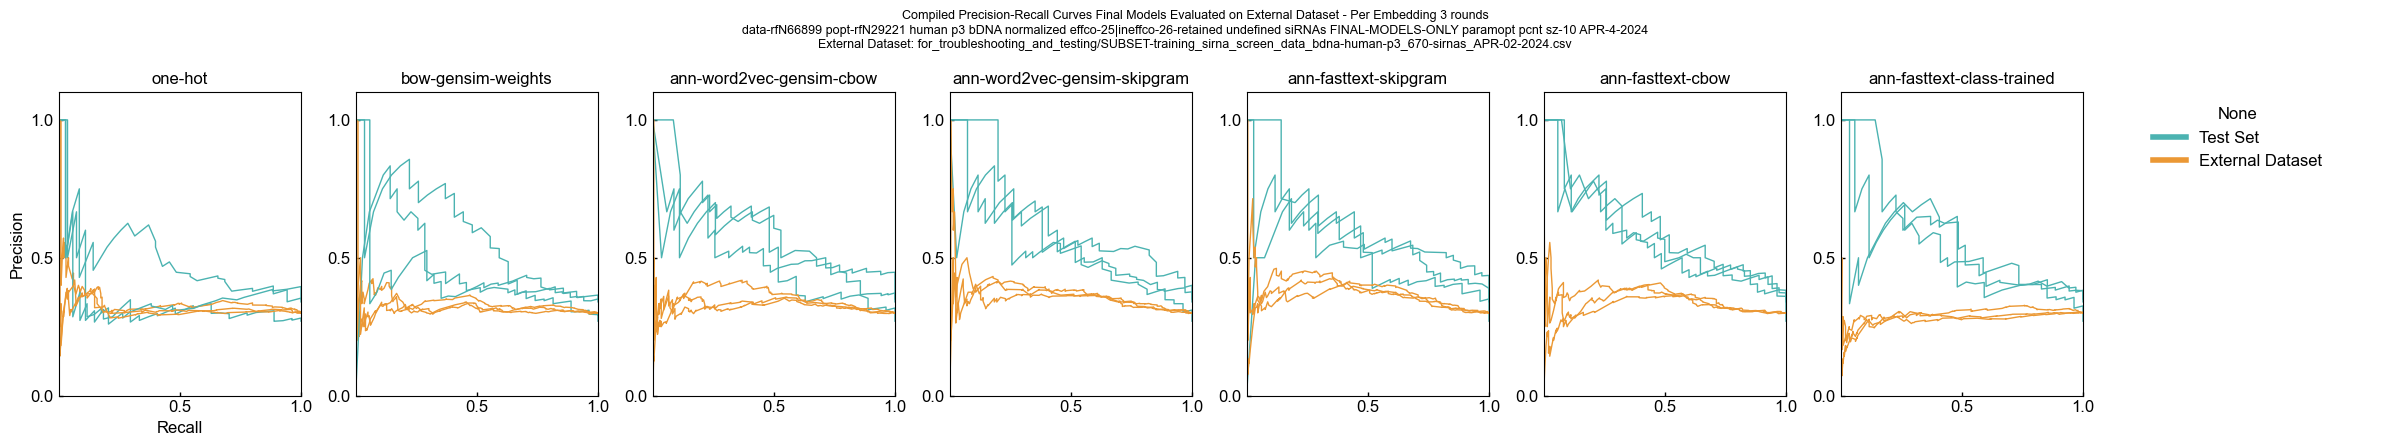

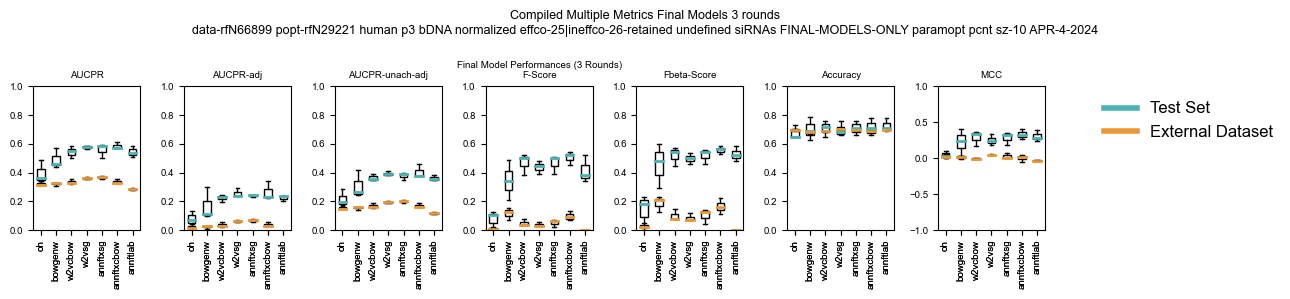

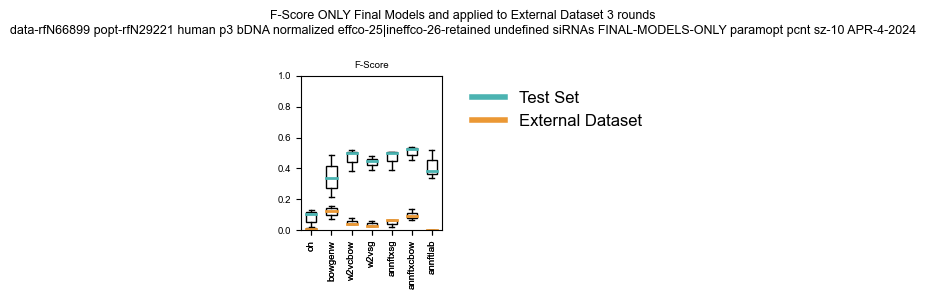

In [6]:
from data_representation import DataRepresentationBuilder

drb = DataRepresentationBuilder(
    model_type__='random-forest',
    parameter_to_optimize__='None',
    run_param_optimization__ = False,
    use_existing_processed_dataset__ = False,
    custom_parameter_values_to_loop__=[],
    num_rerurun_model_building__=3,
    kmer_size__=9,
    flank_len__=20,

    encoding_ls__=[
        'one-hot',
        'bow-gensim-weights',
        'ann-word2vec-gensim-cbow',
        'ann-word2vec-gensim-skipgram',
        'ann-fasttext-skipgram',
        'ann-fasttext-cbow',
        'ann-fasttext-class-trained',
        # 'bow-countvect', # TODO: DEBUG there is something wrong, taking very long to run (infinite looping?)
    ],
    input_data_dir__ = 'new_input_data/',
    apply_final_models_to_external_dataset__ = True,
    

    #input_data_file__ = train_data_file.replace('new_input_data/',''),
    #input_data_file__ = subset_training_data_file.replace('new_input_data/',''),
    input_data_file__ = ext_data_file.replace('new_input_data/',''),
    
    remove_undefined__ = False,
    
    effco__=25, # 25, 
    ineffco__=26, # 60,
    
    
    #external_data_file__ = ext_data_file.replace('new_input_data/',''),
    external_data_file__ = subset_training_data_file.replace('new_input_data/',''),

    
)



# (TESTING) Build Model with Smaller Training Dataset 
***(and apply to same Smaller Training Dataset)***




IMPORTANT: run_param_optimization__ is set to (False) so will not be running parameter optimization(will only be building final models). Any mention of parameter optimization from Constructor can be ignored.






NOTE: running without optimizing any parameters






NOTE: parameter_to_optimize = (None) if this parameter was set in the input, it will be ignored!	 Instead will consider these parameter values: [ ]



Date set successfully! APR-2-2024

Creating processed datasets...

	 all_data_label_str_ = human_p3_bDNA_normalized_effco-25|ineffco-60-removed_undefined_siRNAs
	 abbrev_all_data_label_str_ = h_p3_bDNA_oh-bowgenw-w2vcbow-w2vsg-annftxsg-annftxcbow-annftlab_norm_25-60-rm-u
Creating processed datasets...
Successfully read in .csv data



Successfully read in - 670 siRNAs
P3    670
Name: chemical_scaffold, dtype: int64

bDNA    670
Name: screen_type, dtype: int64

human    670
Name: species, dtype: int64
Selecting data with screen type:
 ['bDNA']
Selecting data with species:


Read 0M words
Number of words:  18546
Number of labels: 0
Progress: 100.0% words/sec/thread:   25178 lr:  0.000000 avg.loss:  0.848199 ETA:   0h 0m 0s


encoding: ann-fasttext-cbow


Read 0M words
Number of words:  18546
Number of labels: 0
Progress: 100.0% words/sec/thread:  113651 lr:  0.000000 avg.loss:  2.978649 ETA:   0h 0m 0s
Read 0M words
Number of words:  18546
Number of labels: 3


encoding: ann-fasttext-class-trained


Progress: 100.0% words/sec/thread:  345111 lr:  0.000000 avg.loss:  1.102534 ETA:   0h 0m 0s




Encoded vector lengths:


one-hot	 bow-countvect	 bow-gensim	 bow-gensim-weights	 ann-keras	 ann-word2vec-gensim	 ann-word2vec-gensim-cbow	 ann-word2vec-gensim-skipgram	 ann-fasttext-cbow	 ann-fasttext-skipgram	 ann-fasttext-class-trained
240 	 54 		 120 		 120 		 120 		 120 		 120 		
240 	 54 		 120 		 120 		 120 		 120 		 120 		

Splitting Datasets into train/test/paramopt...
self.datasplit_id_ | Randomized 8-digit ID for this Set of Rounds:	 rfN62642
All datasets will be stored in:
 /Users/kmonopoli/Dropbox (UMass Medical School)/data_representation-sequences/cleaned_parameter_optimization/data_representation_parameter_optimizationoutput_model_fitting/
	data-rfN62642_h_p3_bDNA_oh-bowgenw-w2vcbow-w2vsg-annftxsg-annftxcbow-annftlab_norm_25-60-rm-u/
Data processing parameter data appeneded to: 
	 output_model_fitting/data-processing-param-index.csv
Figure saved to: output_model_fitting/data-rfN62642_h_p3_bDNA_oh-bowgenw-w2vcbow-w2vsg-annftxsg-annftxcbow-annftlab_norm_25-60-rm-u/figur


Computing Final fbeta_score with beta = 0.5

Evaluating performance on external dataset for model 2 / 3...


Computing Final fbeta_score with beta = 0.5



Final model 2 with encoding one-hot saved to: ~/

models/final_rf_model_rnd-2_oh.pickle

Computing Final fbeta_score with beta = 0.5

Evaluating performance on external dataset for model 2 / 3...


Computing Final fbeta_score with beta = 0.5



Final model 2 with encoding bow-gensim-weights saved to: ~/

models/final_rf_model_rnd-2_bowgenw.pickle

Computing Final fbeta_score with beta = 0.5

Evaluating performance on external dataset for model 2 / 3...


Computing Final fbeta_score with beta = 0.5



Final model 2 with encoding ann-word2vec-gensim-cbow saved to: ~/

models/final_rf_model_rnd-2_w2vcbow.pickle

Computing Final fbeta_score with beta = 0.5

Evaluating performance on external dataset for model 2 / 3...


Computing Final fbeta_score with beta = 0.5



Final model 2 with encoding ann-word2vec-gensim-skipgram saved to: ~/


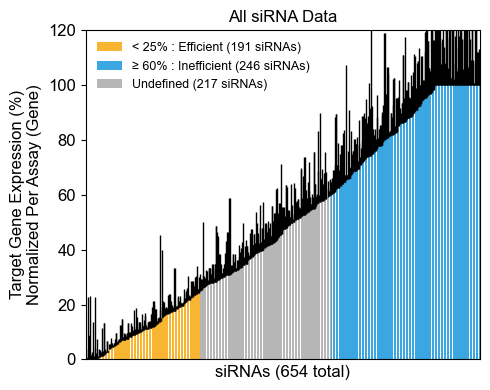

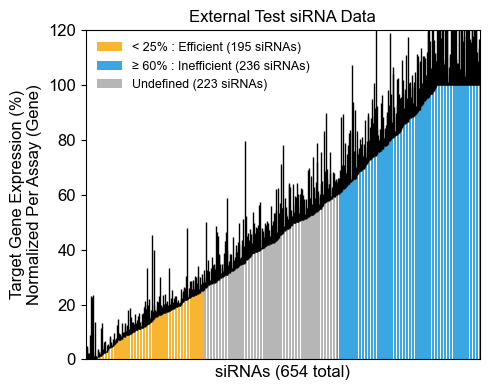

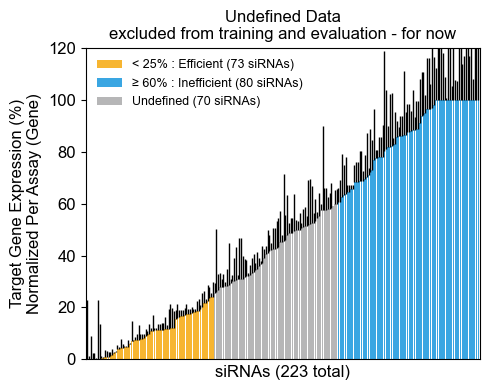

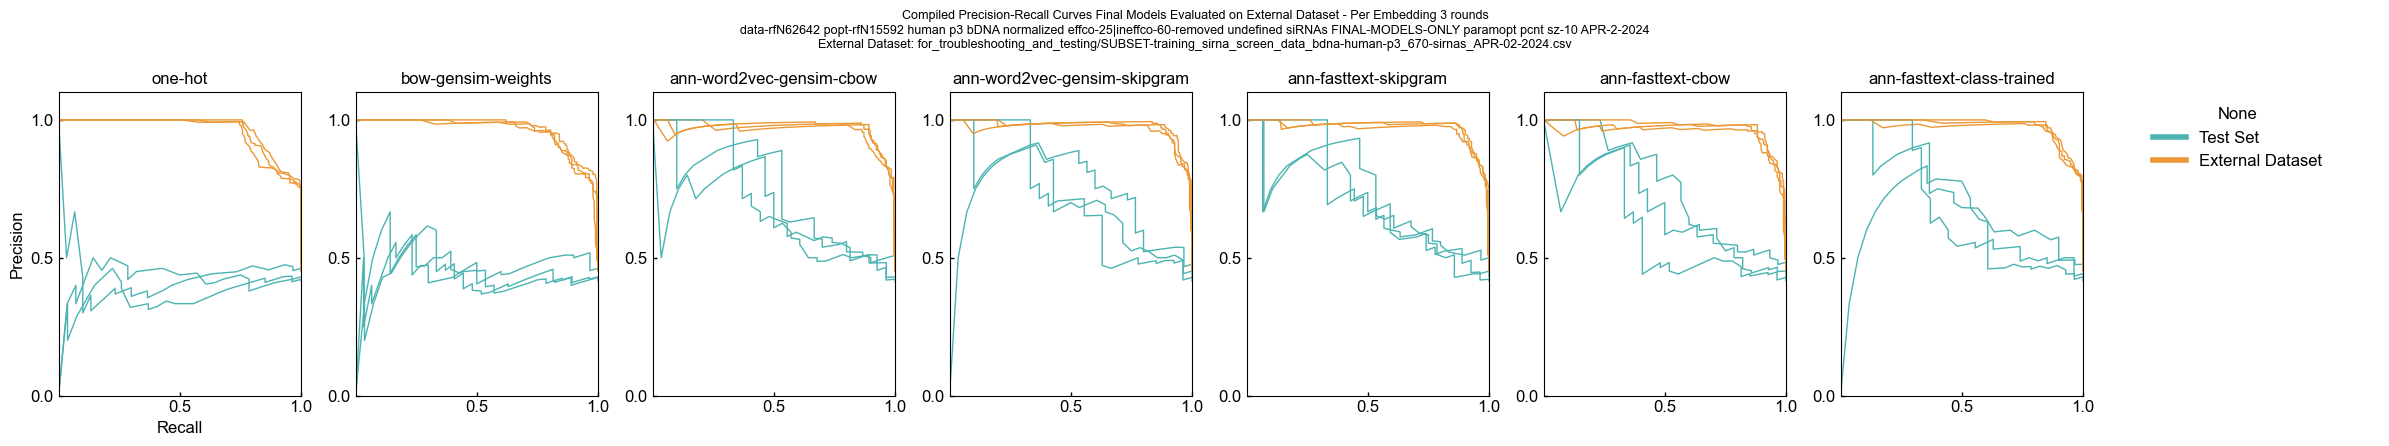

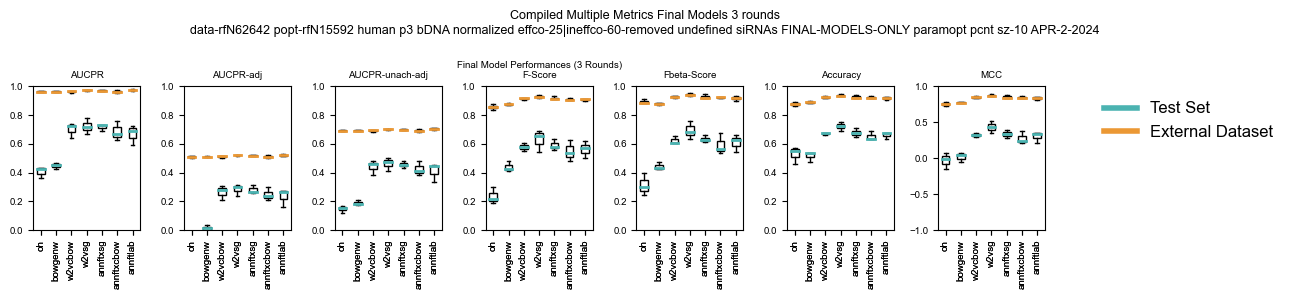

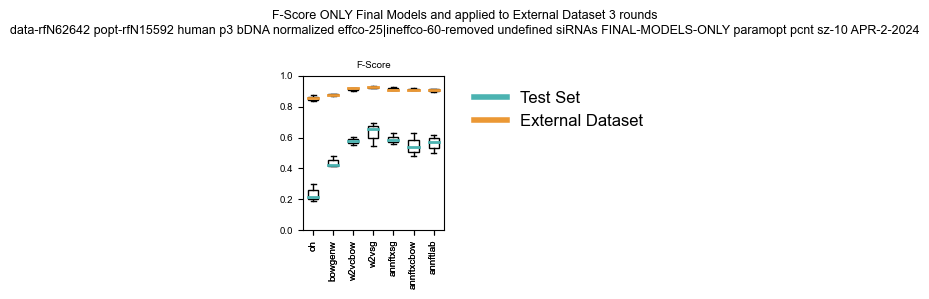

In [4]:
from data_representation import DataRepresentationBuilder

drb = DataRepresentationBuilder(
    model_type__='random-forest',
    parameter_to_optimize__='None',
    run_param_optimization__ = False,
    use_existing_processed_dataset__ = False,
    custom_parameter_values_to_loop__=[],
    num_rerurun_model_building__=3,
    kmer_size__=9,
    flank_len__=20,

    encoding_ls__=[
        'one-hot',
        'bow-gensim-weights',
        'ann-word2vec-gensim-cbow',
        'ann-word2vec-gensim-skipgram',
        'ann-fasttext-skipgram',
        'ann-fasttext-cbow',
        'ann-fasttext-class-trained',
        # 'bow-countvect', # TODO: DEBUG there is something wrong, taking very long to run (infinite looping?)
    ],
    input_data_dir__ = 'new_input_data/',
    apply_final_models_to_external_dataset__ = True,
    

    #input_data_file__ = train_data_file.replace('new_input_data/',''),
    input_data_file__ = subset_training_data_file.replace('new_input_data/',''),
    #input_data_file__ = ext_data_file.replace('new_input_data/',''),
    
    #external_data_file__ = ext_data_file.replace('new_input_data/',''),
    external_data_file__ = subset_training_data_file.replace('new_input_data/',''),

    
)



# (TESTING) Build Model with External Dataset 
***(and apply to same External Dataset)***




IMPORTANT: run_param_optimization__ is set to (False) so will not be running parameter optimization(will only be building final models). Any mention of parameter optimization from Constructor can be ignored.






NOTE: running without optimizing any parameters






NOTE: parameter_to_optimize = (None) if this parameter was set in the input, it will be ignored!	 Instead will consider these parameter values: [ ]



Date set successfully! APR-2-2024

Creating processed datasets...

	 all_data_label_str_ = human_p3_bDNA_normalized_effco-25|ineffco-60-removed_undefined_siRNAs
	 abbrev_all_data_label_str_ = h_p3_bDNA_oh-bowgenw-w2vcbow-w2vsg-annftxsg-annftxcbow-annftlab_norm_25-60-rm-u
Creating processed datasets...
Successfully read in .csv data



Successfully read in - 670 siRNAs
P3    670
Name: chemical_scaffold, dtype: int64

bDNA    670
Name: screen_type, dtype: int64

human    670
Name: species, dtype: int64
Selecting data with screen type:
 ['bDNA']
Selecting data with species:


Read 0M words
Number of words:  13631
Number of labels: 0
Progress: 100.0% words/sec/thread:   30122 lr:  0.000000 avg.loss:  0.705406 ETA:   0h 0m 0s


encoding: ann-fasttext-cbow


Read 0M words
Number of words:  13631
Number of labels: 0
Progress: 100.0% words/sec/thread:  138771 lr:  0.000000 avg.loss:  2.418365 ETA:   0h 0m 0s
Read 0M words
Number of words:  13631
Number of labels: 3


encoding: ann-fasttext-class-trained


Progress: 100.0% words/sec/thread:  358011 lr:  0.000000 avg.loss:  1.102534 ETA:   0h 0m 0s




Encoded vector lengths:


one-hot	 bow-countvect	 bow-gensim	 bow-gensim-weights	 ann-keras	 ann-word2vec-gensim	 ann-word2vec-gensim-cbow	 ann-word2vec-gensim-skipgram	 ann-fasttext-cbow	 ann-fasttext-skipgram	 ann-fasttext-class-trained
240 	 54 		 120 		 120 		 120 		 120 		 120 		
240 	 54 		 120 		 120 		 120 		 120 		 120 		

Splitting Datasets into train/test/paramopt...
self.datasplit_id_ | Randomized 8-digit ID for this Set of Rounds:	 rfN46709
All datasets will be stored in:
 /Users/kmonopoli/Dropbox (UMass Medical School)/data_representation-sequences/cleaned_parameter_optimization/data_representation_parameter_optimizationoutput_model_fitting/
	data-rfN46709_h_p3_bDNA_oh-bowgenw-w2vcbow-w2vsg-annftxsg-annftxcbow-annftlab_norm_25-60-rm-u/
Data processing parameter data appeneded to: 
	 output_model_fitting/data-processing-param-index.csv
Figure saved to: output_model_fitting/data-rfN46709_h_p3_bDNA_oh-bowgenw-w2vcbow-w2vsg-annftxsg-annftxcbow-annftlab_norm_25-60-rm-u/figur


Computing Final fbeta_score with beta = 0.5

Evaluating performance on external dataset for model 2 / 3...


Computing Final fbeta_score with beta = 0.5



Final model 2 with encoding one-hot saved to: ~/

models/final_rf_model_rnd-2_oh.pickle

Computing Final fbeta_score with beta = 0.5

Evaluating performance on external dataset for model 2 / 3...


Computing Final fbeta_score with beta = 0.5



Final model 2 with encoding bow-gensim-weights saved to: ~/

models/final_rf_model_rnd-2_bowgenw.pickle

Computing Final fbeta_score with beta = 0.5

Evaluating performance on external dataset for model 2 / 3...


Computing Final fbeta_score with beta = 0.5



Final model 2 with encoding ann-word2vec-gensim-cbow saved to: ~/

models/final_rf_model_rnd-2_w2vcbow.pickle

Computing Final fbeta_score with beta = 0.5

Evaluating performance on external dataset for model 2 / 3...


Computing Final fbeta_score with beta = 0.5



Final model 2 with encoding ann-word2vec-gensim-skipgram saved to: ~/


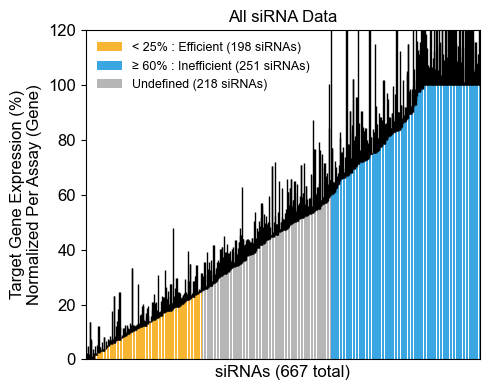

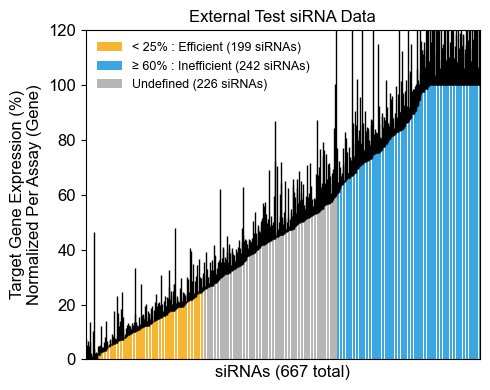

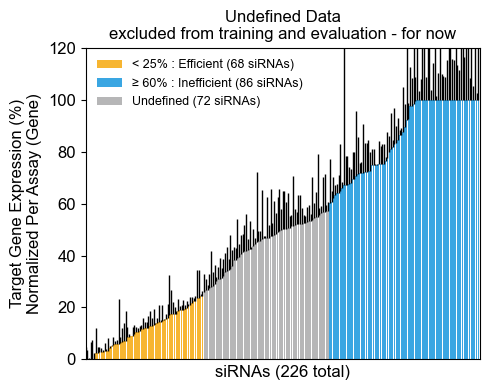

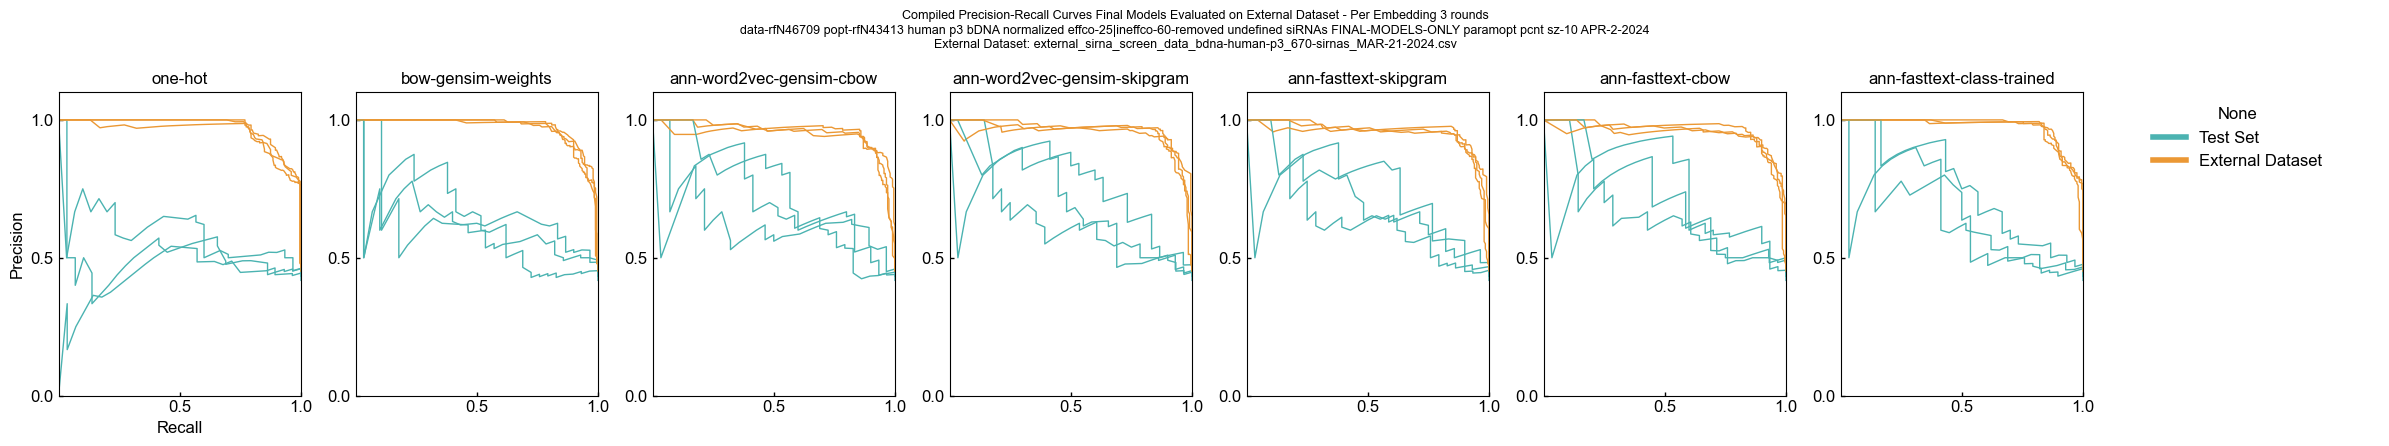

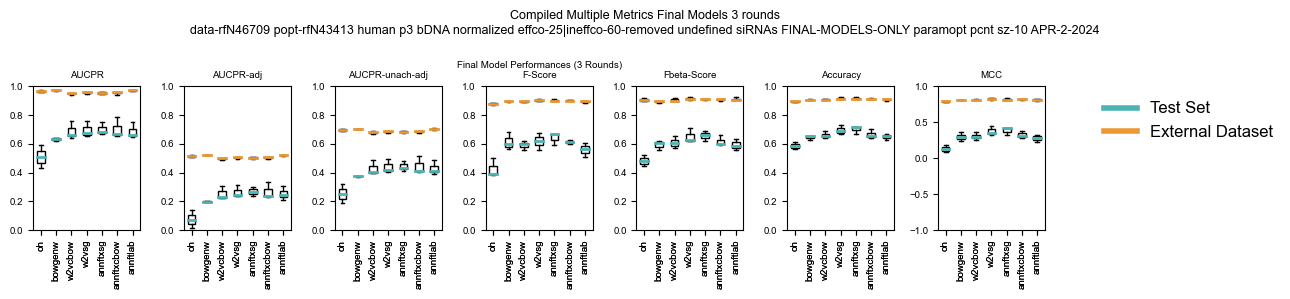

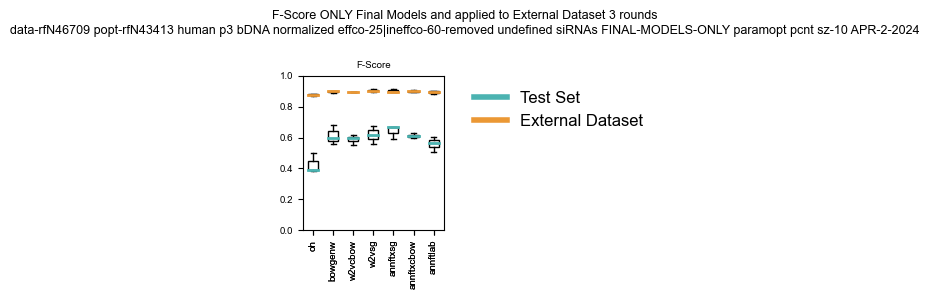

In [3]:
from data_representation import DataRepresentationBuilder

drb = DataRepresentationBuilder(
    model_type__='random-forest',
    parameter_to_optimize__='None',
    run_param_optimization__ = False,
    use_existing_processed_dataset__ = False,
    custom_parameter_values_to_loop__=[],
    num_rerurun_model_building__=3,
    kmer_size__=9,
    flank_len__=20,

    encoding_ls__=[
        'one-hot',
        'bow-gensim-weights',
        'ann-word2vec-gensim-cbow',
        'ann-word2vec-gensim-skipgram',
        'ann-fasttext-skipgram',
        'ann-fasttext-cbow',
        'ann-fasttext-class-trained',
        # 'bow-countvect', # TODO: DEBUG there is something wrong, taking very long to run (infinite looping?)
    ],
    input_data_dir__ = 'new_input_data/',
    apply_final_models_to_external_dataset__ = True,
    

    #input_data_file__ = train_data_file.replace('new_input_data/',''),
    #input_data_file__ = subset_training_data_file.replace('new_input_data/',''),
    input_data_file__ = ext_data_file.replace('new_input_data/',''),
    
    external_data_file__ = ext_data_file.replace('new_input_data/',''),
    #external_data_file__ = subset_training_data_file.replace('new_input_data/',''),

    
)



# (TESTING) Build Model with Smaller Training Dataset 
### with closer eff/ineff THRESHOLDS
***(and apply to same Smaller Training Dataset)***




IMPORTANT: run_param_optimization__ is set to (False) so will not be running parameter optimization(will only be building final models). Any mention of parameter optimization from Constructor can be ignored.






NOTE: running without optimizing any parameters






NOTE: parameter_to_optimize = (None) if this parameter was set in the input, it will be ignored!	 Instead will consider these parameter values: [ ]



Date set successfully! APR-2-2024

Creating processed datasets...

	 all_data_label_str_ = human_p3_bDNA_normalized_effco-25|ineffco-26-removed_undefined_siRNAs
	 abbrev_all_data_label_str_ = h_p3_bDNA_oh-bowgenw-w2vcbow-w2vsg-annftxsg-annftxcbow-annftlab_norm_25-26-rm-u
Creating processed datasets...
Successfully read in .csv data



Successfully read in - 670 siRNAs
P3    670
Name: chemical_scaffold, dtype: int64

bDNA    670
Name: screen_type, dtype: int64

human    670
Name: species, dtype: int64
Selecting data with screen type:
 ['bDNA']
Selecting data with species:


Read 0M words
Number of words:  18546
Number of labels: 0
Progress: 100.0% words/sec/thread:   24353 lr:  0.000000 avg.loss:  0.846072 ETA:   0h 0m 0s


encoding: ann-fasttext-cbow


Read 0M words
Number of words:  18546
Number of labels: 0
Progress: 100.0% words/sec/thread:  112207 lr:  0.000000 avg.loss:  2.996850 ETA:   0h 0m 0s


encoding: ann-fasttext-class-trained


Read 0M words
Number of words:  18546
Number of labels: 3
Progress: 100.0% words/sec/thread:  343690 lr:  0.000000 avg.loss:  1.102534 ETA:   0h 0m 0s




Encoded vector lengths:


one-hot	 bow-countvect	 bow-gensim	 bow-gensim-weights	 ann-keras	 ann-word2vec-gensim	 ann-word2vec-gensim-cbow	 ann-word2vec-gensim-skipgram	 ann-fasttext-cbow	 ann-fasttext-skipgram	 ann-fasttext-class-trained
240 	 54 		 120 		 120 		 120 		 120 		 120 		
240 	 54 		 120 		 120 		 120 		 120 		 120 		

Splitting Datasets into train/test/paramopt...
self.datasplit_id_ | Randomized 8-digit ID for this Set of Rounds:	 rfN16176
All datasets will be stored in:
 /Users/kmonopoli/Dropbox (UMass Medical School)/data_representation-sequences/cleaned_parameter_optimization/data_representation_parameter_optimizationoutput_model_fitting/
	data-rfN16176_h_p3_bDNA_oh-bowgenw-w2vcbow-w2vsg-annftxsg-annftxcbow-annftlab_norm_25-26-rm-u/
Data processing parameter data appeneded to: 
	 output_model_fitting/data-processing-param-index.csv
Figure saved to: output_model_fitting/data-rfN16176_h_p3_bDNA_oh-bowgenw-w2vcbow-w2vsg-annftxsg-annftxcbow-annftlab_norm_25-26-rm-u/figur


Computing Final fbeta_score with beta = 0.5

Evaluating performance on external dataset for model 2 / 3...


Computing Final fbeta_score with beta = 0.5



Final model 2 with encoding one-hot saved to: ~/

models/final_rf_model_rnd-2_oh.pickle

Computing Final fbeta_score with beta = 0.5

Evaluating performance on external dataset for model 2 / 3...


Computing Final fbeta_score with beta = 0.5



Final model 2 with encoding bow-gensim-weights saved to: ~/

models/final_rf_model_rnd-2_bowgenw.pickle

Computing Final fbeta_score with beta = 0.5

Evaluating performance on external dataset for model 2 / 3...


Computing Final fbeta_score with beta = 0.5



Final model 2 with encoding ann-word2vec-gensim-cbow saved to: ~/

models/final_rf_model_rnd-2_w2vcbow.pickle

Computing Final fbeta_score with beta = 0.5

Evaluating performance on external dataset for model 2 / 3...


Computing Final fbeta_score with beta = 0.5



Final model 2 with encoding ann-word2vec-gensim-skipgram saved to: ~/


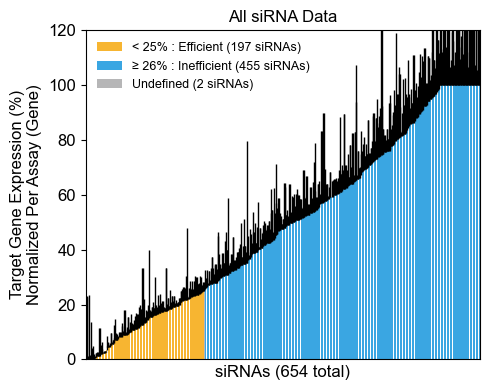

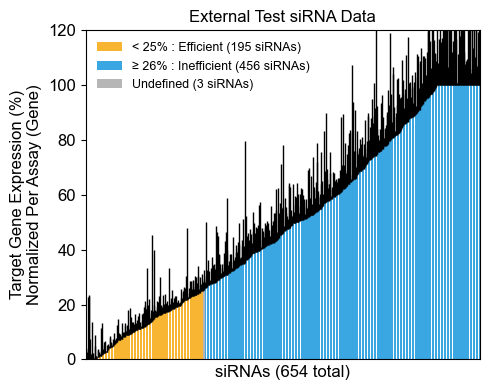

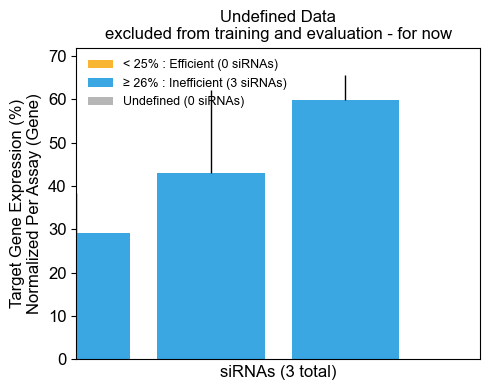

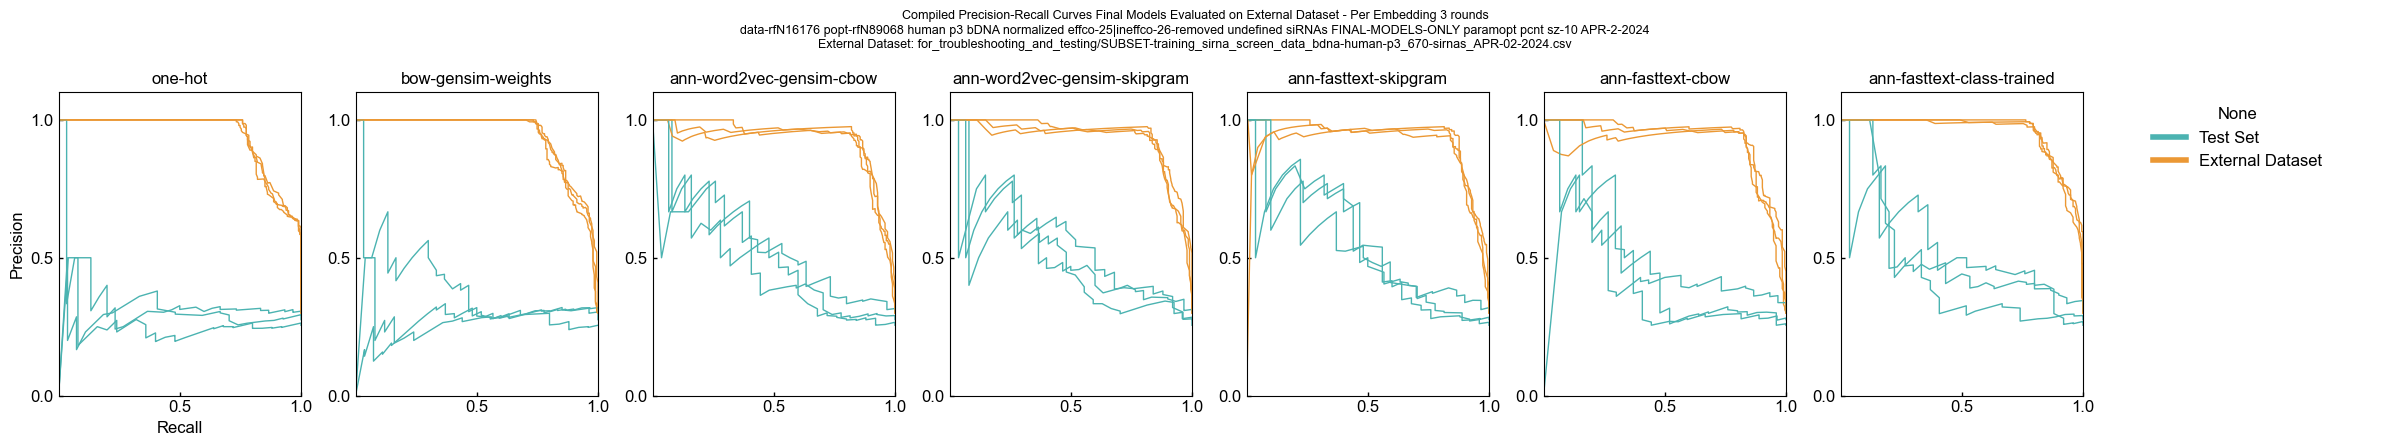

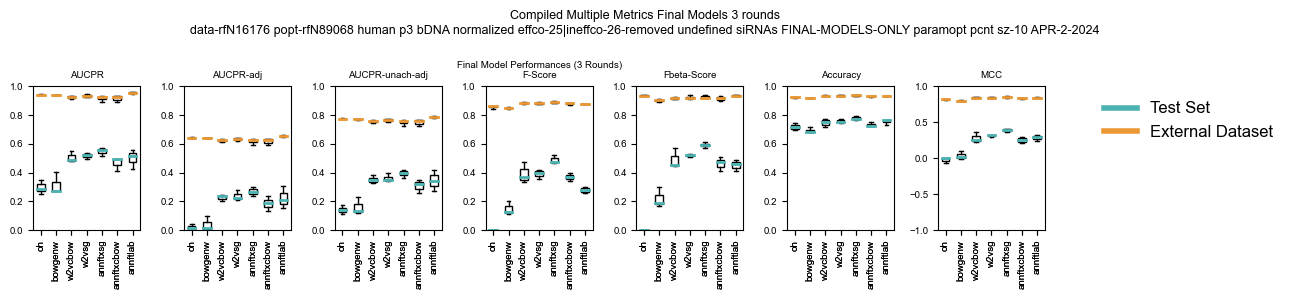

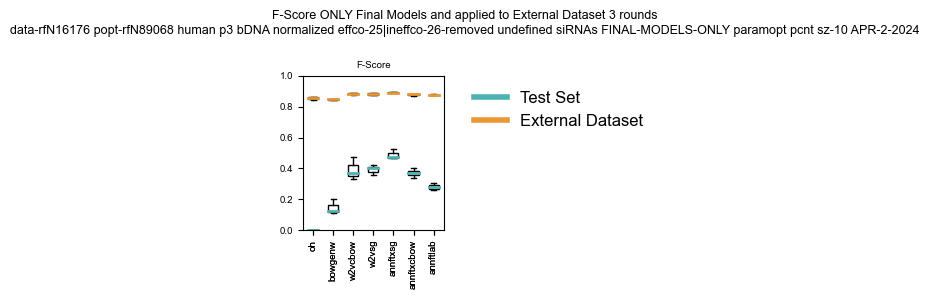

In [8]:


from data_representation import DataRepresentationBuilder

drb = DataRepresentationBuilder(
    effco__=25, # 25, 
    ineffco__=26, # 60,
    
    model_type__='random-forest',
    parameter_to_optimize__='None',
    run_param_optimization__ = False,
    use_existing_processed_dataset__ = False,
    custom_parameter_values_to_loop__=[],
    num_rerurun_model_building__=3,
    kmer_size__=9,
    flank_len__=20,

    encoding_ls__=[
        'one-hot',
        'bow-gensim-weights',
        'ann-word2vec-gensim-cbow',
        'ann-word2vec-gensim-skipgram',
        'ann-fasttext-skipgram',
        'ann-fasttext-cbow',
        'ann-fasttext-class-trained',
        # 'bow-countvect', # TODO: DEBUG there is something wrong, taking very long to run (infinite looping?)
    ],
    input_data_dir__ = 'new_input_data/',
    apply_final_models_to_external_dataset__ = True,
    

    #input_data_file__ = train_data_file.replace('new_input_data/',''),
    input_data_file__ = subset_training_data_file.replace('new_input_data/',''),
    #input_data_file__ = ext_data_file.replace('new_input_data/',''),
    
    #external_data_file__ = ext_data_file.replace('new_input_data/',''),
    external_data_file__ = subset_training_data_file.replace('new_input_data/',''),

    
)



# Build Model with Training Dataset 
### with closer eff/ineff THRESHOLDS
***(and apply to External Dataset)***

In [ ]:

from data_representation import DataRepresentationBuilder

drb = DataRepresentationBuilder(
    effco__=25, # 25, 
    ineffco__=26, # 60,
    
    model_type__='random-forest',
    parameter_to_optimize__='None',
    run_param_optimization__ = False,
    use_existing_processed_dataset__ = False,
    custom_parameter_values_to_loop__=[],
    num_rerurun_model_building__=3,
    kmer_size__=9,
    flank_len__=20,

    encoding_ls__=[
        'one-hot',
        'bow-gensim-weights',
        'ann-word2vec-gensim-cbow',
        'ann-word2vec-gensim-skipgram',
        'ann-fasttext-skipgram',
        'ann-fasttext-cbow',
        'ann-fasttext-class-trained',
        # 'bow-countvect', # TODO: DEBUG there is something wrong, taking very long to run (infinite looping?)
    ],
    input_data_dir__ = 'new_input_data/',
    apply_final_models_to_external_dataset__ = True,
    

    input_data_file__ = train_data_file.replace('new_input_data/',''),
    #input_data_file__ = subset_training_data_file.replace('new_input_data/',''),
    #input_data_file__ = ext_data_file.replace('new_input_data/',''),
    
    external_data_file__ = ext_data_file.replace('new_input_data/',''),
    #external_data_file__ = subset_training_data_file.replace('new_input_data/',''),

    
)


